In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.visualization import astropy_mpl_style
from numpy.polynomial.polynomial import polyfit
from scipy.optimize import curve_fit
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from scipy import optimize
import pandas as pd
import math
import statistics
from scipy.ndimage import gaussian_filter1d 
import csv
import sys
from lmfit import Model
from scipy.signal import medfilt 

In [2]:
path='/mnt/data/sarath/UNAB-PHD/Semester-1/Project-lensed Quasars/new lenses/Spectra for plotting/'


In [3]:
emission_lines=[1215.67,1393.,1240.81,1549.48,1640.42,1908.734,2800.315188621943,3727.0917225096655,
                3729.87544376128,3869.8567959162406,3890.151079071683,3971.1231883143773,4102.891635399645,
                4341.684323950415,4364.435312373618,4686.991466008997,4862.683021040764,4960.294931825264,
                5008.239669615672,5413.024467154929,5578.887753538833,5756.186156709958,5877.308574906249,
                6302.046448389282,6313.80560491733,6365.535493114148,6549.859008201306,6564.613973710928,
                6585.26852522626,6718.294291949573,6732.678160576219,7137.75719911729]
    

In [4]:
def gauss4(x,c,a,ga,gb,gc,ga1,gb1,gc1,ga2,gb2,gc2,ga3,gb3,gc3):
    return ( c+a*x+ga*np.exp(-((x-gb)/gc)**2 )+ga1*np.exp(-((x-gb1)/gc1)**2)+ga2*np.exp(-((x-gb2)/gc2)**2 )
           +ga3*np.exp(-((x-gb3)/gc3)**2 ))
def gauss3(x,c,a,ga,gb,gc,ga1,gb1,gc1,ga2,gb2,gc2):
    return ( c+a*x+ga*np.exp(-((x-gb)/gc)**2 )+ga1*np.exp(-((x-gb1)/gc1)**2)
            +ga2*np.exp(-((x-gb2)/gc2)**2 ))
def gauss2(x,c,a,ga,gb,gc,ga1,gb1,gc1):
    return ( c+a*x+ga*np.exp(-((x-gb)/gc)**2 )+ga1*np.exp(-((x-gb1)/gc1)**2))
def gauss1(x,c,a,ga,gb,gc):
     return ( c+a*x+ga*np.exp(-((x-gb)/gc)**2 ))



In [ ]:
image=source=np.load(path+'J0152-2448.npy',allow_pickle=True)  
x=wavelength=source[2]
z=1.32


x2=x/(z+1)
flux=source[0]
y=bright_flux=flux1=flux[0]
faint_flux=flux2=flux[1]

n=len(x)
mean=sum(x*y)/n
gc=sum(y*(x-mean)**2)/n
gc1=gc
med=statistics.median(bright_flux)
plt.figure()
#plt.plot(wavelength/(z+1),flux1,label='redshifted data')
p0=[med,-0.05,10,1549,1,10,2800,1]

plt.plot(x2,flux1)

popt,pcov= curve_fit(gauss,x,y,p0=p0)
a=round(2*np.sqrt(2*np.log(2))*popt[4])
b=round(2*np.sqrt(2*np.log(2))*popt[7])
    
print('FWHM(CIV)=',a)
print('FWHM(MGII)=',b)

plt.ylim(-10000,10000)
#perr = np.sqrt(np.diag(pcov))
plt.plot(x2, gauss(x,*p0),'r', label='guassianfit')
plt.legend()

In [ ]:
spectra='J0329-0208.npy'
z=1.352
source=np.load(path+spectra,allow_pickle=True)  
print(spectra)

wavelength=source[2]
flux=source[0]
bright_flux=flux1=flux[0]
faint_flux=flux2=flux[1]
###BRIGHT SPECTRUM---------------------------------------------------------------------------------------

x=wavelength/(z+1)
y1=flux1
x= np.nan_to_num(x)
y1= np.nan_to_num(y1)
plt.plot(x,y1)
plt.ylim(-1000,2000)

In [ ]:
fig, ax=plt.subplots(2,1,figsize=(10,10))

n=len(x)
mean=sum(x*y1)/n
gc=sum(y1*(x-mean)**2)/n
gc1=gc2=gc3=gc

#y1=gaussian_filter1d(y1,0.1)## This value should be adjusted
med=statistics.median(y1)
  
p0=[med,0,10,1549,1,10,1908,1,10,1240,1,10,1215,1] #change this when : Optimal parameters not found:
                                            #Number of calls to function has reached maxfev = 1800.
    # p0 will be the median
pos=np.where((x > 1600) & (x < 3500))   
popt1,pcov1= curve_fit(gauss,x[pos],y1[pos],p0=p0)

FWHM_CIV=round(2*np.sqrt(2*np.log(2))*popt1[4])
FWHM_CIII=round(2*np.sqrt(2*np.log(2))*popt1[7])
FWHM_MGII=round(2*np.sqrt(2*np.log(2))*popt1[10])

CIV_low=(popt1[0]+popt1[1]*popt1[3])
CIV_high=(gauss(popt1[3],*popt1))    
CIV_dif=CIV_high-CIV_low

CIII_low=CIV_low=(popt1[0]+popt1[1]*popt1[6])
CIII_high=(gauss(popt1[6],*popt1))    
CIII_dif=CIII_high-CIII_low
MGII_low=(popt1[0]+popt1[1]*popt1[9])
MGII_high=(gauss(popt1[9],*popt1))    
MGII_dif=MGII_high-MGII_low
    #print('MGII_dif=',MGII_dif)
               

    #print('CIV_dif=',CIV_dif)
value=[name[i],CIV_dif,CIII_dif,MGII_dif,FWHM_CIV,FWHM_CIII,FWHM_MGII]
print(value)
with open('CSVFILE_bright.txt', 'a', newline='',) as f_object:
    writer_object = csv.writer(f_object)
    writer_object.writerow(value)  
    f_object.close()
    
perr1 = np.sqrt(np.diag(pcov1))
ax[0].plot(x,y1,label='redshifted data')
ax[0].plot(x, gauss(x, *popt1),'r', label='guassianfit')
#plt.ylim(-500,600)    
ax[0].set_xlabel('Wavelength')
ax[0].set_ylabel('Flux') 
ax[0].set_ylim(-5000,5000)
ax[0].legend()
##FAINT FLUX---------------------------------------------------------------------
x=wavelength/(z+1)
y2=flux2
x= np.nan_to_num(x)
y2= np.nan_to_num(y2)

n=len(x)
mean=sum(x*y2)/n
gc=sum(y2*(x-mean)**2)/n
gc1=gc2=gc3=gc
#y2=gaussian_filter1d(y2,0.1)## This value should be adjusted
med=statistics.median(y2)
    
p1=[med,0,10,1549,1,10,1908,1,10,1240,1,10,1215,1] #change this when : Optimal parameters not found:
                                            #Number of calls to function has reached maxfev = 1800.
    # p0 will be the median
popt2,pcov2= curve_fit(gauss,x[pos],y2[pos],p0=p1)
FWHM_CIV=round(2*np.sqrt(2*np.log(2))*popt2[4])
FWHM_CIII=round(2*np.sqrt(2*np.log(2))*popt2[7])
FWHM_MGII=round(2*np.sqrt(2*np.log(2))*popt2[10])

CIV_low=(popt2[0]+popt2[1]*popt2[3])
CIV_high=(gauss(popt2[3],*popt2))    
CIV_dif=CIV_high-CIV_low

CIII_low=CIV_low=(popt2[0]+popt2[1]*popt2[6])
CIII_high=(gauss(popt2[6],*popt2))    
CIII_dif=CIII_high-CIII_low
MGII_low=(popt2[0]+popt2[1]*popt2[9])
MGII_high=(gauss(popt2[9],*popt2))    
MGII_dif=MGII_high-MGII_low
    #print('MGII_dif=',MGII_dif)
               

    #print('CIV_dif=',CIV_dif)
value1=[name[i],CIV_dif,CIII_dif,MGII_dif,FWHM_CIV,FWHM_CIII,FWHM_MGII]
print(value1)
with open('CSVFILE_faint.txt', 'a', newline='',) as f_object:
    writer_object = csv.writer(f_object)
    writer_object.writerow(value1)  
    f_object.close()
    
perr2 = np.sqrt(np.diag(pcov2))
ax[1].plot(x,y2,label='redshifted data')
ax[1].plot(x, gauss(x, *popt2),'r', label='guassianfit')
#plt.ylim(-500,600)    
ax[1].set_xlabel('Wavelength')
ax[1].set_ylabel('Flux')     
ax[1].set_ylim(-1000,1000)
ax[1].legend()
plt.savefig(path+name[i]+'.png')
plt.show()
plt.clf()

In [8]:
DF=pd.read_csv('NTT.csv',header=0)
a=path+DF.Spectra[0]



J0401-2514.npy
1.32


/tmp/ipykernel_4828/1620475948.py:31: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2
/usr/lib/python3/dist-packages/scipy/optimize/_lsq/trf.py:352: RuntimeWarning: invalid value encountered in double_scalars
  actual_reduction = cost - cost_new


RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

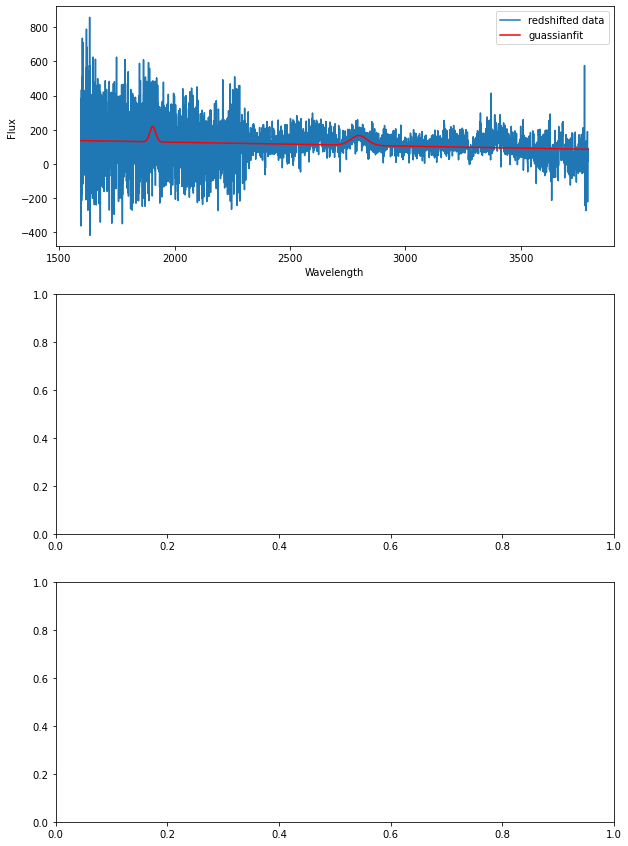

In [23]:
DF=pd.read_csv('WHT.csv',header=0)
Spectra=DF.Spectra
z=DF.z
name=DF.Name
for i in range(0,len(DF)): 
    
    source=np.load(path+Spectra[i],allow_pickle=True)  
    print(Spectra[i])
    z=DF.z[i]
    print(z)
    wavelength=source[2]
    flux=source[0]
    bright_flux=flux1=flux[0]
    faint_flux=flux2=flux[1]
    fig, ax=plt.subplots(3,1,figsize=(10,15))
###BRIGHT SPECTRUM---------------------------------------------------------------------------------------
    x=wavelength
    pos=np.where((x >3700) & (x <8800)) 
    X=wavelength[pos]
    
    x=X/(z+1)
    y1=flux1[pos]
    x= np.nan_to_num(x)
    y1= np.nan_to_num(y1)        
    med1=statistics.median(y1) 
    y2=flux2[pos]
    x= np.nan_to_num(x)
    y2= np.nan_to_num(y2)
    med2=statistics.median(y2)
    
    y3=y1/y2
    
    y3=np.nan_to_num(y3,nan=np.nanmedian(y3))
    y3=medfilt(y3,13)
    med3=statistics.median(y3)
    
    if ((z>=2) and (z<=2.178)):
    
        p01=[med1,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1] #change this when : Optimal parameters not found:
                                             #Number of calls to function has reached maxfev = 1800.
        popt1,pcov1= curve_fit(gauss4,x,y1,p0=p01,
            bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0]
            ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1915,50,np.inf,2815,50]])
        
        
        FWHM_LyA1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[10])
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[13])


        LyA_low1=(popt1[0]+popt1[1]*popt1[3])
        LyA_high1=(gauss4(popt1[3],*popt1))    
        LyA_dif1=LyA_high1-LyA_low1

        CIV_low1=(popt1[0]+popt1[1]*popt1[6])
        CIV_high1=(gauss4(popt1[6],*popt1))    
        CIV_dif1=CIV_high1-CIV_low1
        
        CIII_low1=(popt1[0]+popt1[1]*popt1[9])
        CIII_high1=(gauss4(popt1[9],*popt1))    
        CIII_dif1=CIII_high1-CIII_low1
    
        MgII_low1=(popt1[0]+popt1[1]*popt1[12])
        MgII_high1=(gauss4(popt1[12],*popt1))    
        MgII_dif1=MgII_high1-MgII_low1
        
        
        chi2b1=np.subtract(y1,gauss4(x, *popt1))
        chi2b2=np.divide(chi2b1,gauss4(x, *popt1))
        chi2b=chi2b2/len(x)
        
        r_chi2b=np.round(chi2b,4)
        print(r_chi2b)           
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss4(x, *popt1),'r', label='guassianfit')
#         ax[0].text(min(x),max(y1),r_chi2b)
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1] #change this when : Optimal parameters not found:
                                                 #Number of calls to function has reached maxfev = 1800.
        popt2,pcov2= curve_fit(gauss4,x,y2,p0=p02,
        bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0]
                 ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])

        FWHM_LyA2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[10])
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[13])


        LyA_low2=(popt2[0]+popt2[1]*popt2[3])
        LyA_high2=(gauss4(popt2[3],*popt2))    
        LyA_dif2=LyA_high2-LyA_low2
#         LyA_perr2 = np.sqrt(np.diag(pcov2[3]))
        

        CIV_low2=(popt2[0]+popt2[1]*popt2[6])
        CIV_high2=(gauss4(popt2[6],*popt2))    
        CIV_dif2=CIV_high2-CIV_low2
#         CIV_perr2 = np.sqrt(np.diag(pcov2[6]))
    
        CIII_low2=(popt2[0]+popt2[1]*popt2[9])
        CIII_high2=(gauss4(popt2[9],*popt2))    
        CIII_dif2=CIII_high2-CIII_low2
#         CIII_perr2 = np.sqrt(np.diag(pcov2[9]))
    
        MgII_low2=(popt2[0]+popt2[1]*popt2[12])
        MgII_high2=(gauss4(popt2[12],*popt2))    
        MgII_dif2=MgII_high2-MgII_low2
#         MgII_perr2 = np.sqrt(np.diag(pcov2[12]))

        chi2f=np.subtract(y2,gauss4(x, *popt2))
        chi2f=np.divide(chi2f,gauss4(x, *popt2))
        r_chi2f=chi2f/len(x)
        
        
        p03=[med3,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1]
        popt3,pcov3= curve_fit(gauss4,x,y3,p0=p03,
        bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0]
                 ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])

        FWHM_LyA3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_CIV3=round(2*np.sqrt(2*np.log(2))*popt3[7])
        FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[10])
        FWHM_MgII3=round(2*np.sqrt(2*np.log(2))*popt3[13])


        LyA_low3=(popt3[0]+popt3[1]*popt3[3])
        LyA_high3=(gauss4(popt3[3],*popt3))    
        LyA_dif3=LyA_high3-LyA_low3
#         LyA_perr3 = np.sqrt(np.diag(pcov3[3]))

        CIV_low3=(popt3[0]+popt3[1]*popt3[6])
        CIV_high3=(gauss4(popt3[6],*popt3))    
        CIV_dif3=CIV_high3-CIV_low3
#         CIV_perr3 = np.sqrt(np.diag(pcov3[6]))
    
        CIII_low3=(popt3[0]+popt3[1]*popt3[9])
        CIII_high3=(gauss4(popt3[9],*popt3))    
        CIII_dif3=CIII_high3-CIII_low3
#         CIII_perr3 = np.sqrt(np.diag(pcov3[9]))
    
        MgII_low3=(popt3[0]+popt3[1]*popt3[12])
        MgII_high3=(gauss4(popt3[12],*popt3))    
        MgII_dif3=MgII_high3-MgII_low3
        
        chi2r=np.subtract(y3,gauss4(x, *popt3))
        chi2r=np.divide(chi2r,gauss4(x, *popt3))
        r_chi2r=chi2r/len(x)
        
#         MgII_perr3 = np.sqrt(np.diag(pcov3[12]))
               
               
     #   print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
     #     'CIV_Conti','CIII_Conti','MgII_Conti')
#         value1=[name[i],LyA_high1,CIV_dif1,CIII_dif1,MgII_dif1,FWHM_LyA1,FWHM_CIV1,FWHM_CIII1,FWHM_MgII1,popt1[3],popt1[6],
#           popt1[9],popt1[12]]
#         value2=[name[i],LyA_dif2,CIV_dif2,CIII_dif2,MgII_dif2,FWHM_LyA2,FWHM_CIV2,FWHM_CIII2,FWHM_MgII2,
#                popt2[3],popt2[6],popt2[9],popt2[12]]
        value=[name[i],LyA_high1,LyA_low1,FWHM_LyA1,popt1[3],LyA_high2,LyA_low2,FWHM_LyA2,popt2[3],
               LyA_high3,LyA_low3,FWHM_LyA3,popt3[3],
               CIV_high1,CIV_low1,FWHM_CIV1,popt1[6],CIV_high2,CIV_low2,FWHM_CIV2,popt2[6],
               CIV_high3,CIV_low3,FWHM_CIV3,popt3[6],
               CIII_high1,CIII_low1,FWHM_CIII1,popt1[9],CIII_high2,CIII_low2,FWHM_CIII2,popt2[9],
               CIII_high3,CIII_low3,FWHM_CIII3,popt3[9],
               MgII_high1,MgII_low1,FWHM_MgII1,popt1[12],MgII_high2,MgII_low2,FWHM_MgII2,popt2[12],
               MgII_high3,MgII_low3,FWHM_MgII3,popt3[12]]
        print(value)
        
        
        r_chi2f=np.round(r_chi2f,4)
#         ax[1].text(min(x),max(y2),r_chi2f)

        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss4(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        
        
        r_chi2r=np.round(r_chi2r,4)
#         ax[2].text(min(x),max(y3),r_chi2r)

        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss4(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
        
        
        
        
        
        
    elif ((z>=1.42) and (z<=2.178)):
        p01=[med1,1,10,1549,1,10,1908,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss3,x,y1,p0=p01,
                               bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0],
                    [np.inf,np.inf,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])
        
        
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[10])



        CIV_low1=(popt1[0]+popt1[1]*popt1[3])
        CIV_high1=(gauss3(popt1[3],*popt1))    
        CIV_dif1=CIV_high1-CIV_low1
#         CIV_perr1 = np.sqrt(np.diag(pcov1[3]))

    
        CIII_low1=(popt1[0]+popt1[1]*popt1[6])
        CIII_high1=(gauss3(popt1[6],*popt1))    
        CIII_dif1=CIII_high1-CIII_low1
#         CIII_perr1 = np.sqrt(np.diag(pcov1[6]))
    
        MgII_low1=(popt1[0]+popt1[1]*popt1[9])
        MgII_high1=(gauss3(popt1[9],*popt1))    
        MgII_dif1=MgII_high1-MgII_low1
        
        chi2b=np.subtract(y1,gauss3(x, *popt1))
        chi2b=np.divide(chi2b,gauss3(x, *popt1))
        r_chi2b1=np.sum(chi2b)
        r_chi2b2=r_chi2b1/len(x)
        
        r_chi2b=np.round(r_chi2b2,4)
        
        print(r_chi2b)
#         ax[0].text(min(x),max(y1),r_chi2b)

        
#         MgII_perr1 = np.sqrt(np.diag(pcov1[9]))
               
      #  print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
      #    'CIV_Conti','CIII_Conti','MgII_Conti')
#         value1=[name[i],0,CIV_dif1,CIII_dif1,MgII_dif1,0,FWHM_CIV1,FWHM_CIII1,FWHM_MgII1,0,
#                 popt1[3],popt1[6],popt1[9]]
#         print(value1)
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss3(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1549,1,10,1908,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss3,x,y2,p0=p02,
                                 bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0],
                            [np.inf,np.inf,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])

        
        
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[10])



        CIV_low2=(popt2[0]+popt2[1]*popt2[3])
        CIV_high2=(gauss3(popt2[3],*popt2))    
        CIV_dif2=CIV_high2-CIV_low2
#         CIV_perr2 = np.sqrt(np.diag(pcov2[3]))
    
        CIII_low2=(popt2[0]+popt2[1]*popt2[6])
        CIII_high2=(gauss3(popt2[6],*popt2))    
        CIII_dif2=CIII_high2-CIII_low2
#         CIII_perr2 = np.sqrt(np.diag(pcov2[6]))
    
        MgII_low2=(popt2[0]+popt2[1]*popt2[9])
        MgII_high2=(gauss3(popt2[9],*popt2))    
        MgII_dif2=MgII_high2-MgII_low2
#         MgII_perr2 = np.sqrt(np.diag(pcov2[9]))


        chi2f=np.subtract(y2,gauss3(x, *popt2))
        chi2f1=np.divide(chi2f,gauss3(x, *popt2))
        r_chi2f1=chi2f1/len(x)
        
        p03=[med3,1,10,1549,1,10,1908,1,10,2800,1]
        popt3,pcov3= curve_fit(gauss3,x,y3,p0=p03,
                               bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0],
                            [np.inf,np.inf,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])

        
        
        FWHM_CIV3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[7])
        FWHM_MgII3=round(2*np.sqrt(2*np.log(2))*popt3[10])



        CIV_low3=(popt3[0]+popt3[1]*popt3[3])
        CIV_high3=(gauss3(popt3[3],*popt3))    
        CIV_dif3=CIV_high3-CIV_low3
#         CIV_perr3 = np.sqrt(np.diag(pcov3[3]))
    
        CIII_low3=(popt3[0]+popt3[1]*popt3[6])
        CIII_high3=(gauss3(popt3[6],*popt3))    
        CIII_dif3=CIII_high3-CIII_low3
#         CIII_perr3 = np.sqrt(np.diag(pcov3[6]))
    
        MgII_low3=(popt3[0]+popt3[1]*popt3[9])
        MgII_high3=(gauss3(popt3[9],*popt3))    
        MgII_dif3=MgII_high3-MgII_low3
        
        chi2r=np.subtract(y3,gauss3(x, *popt3))
        chi2r1=np.divide(chi2r,gauss3(x, *popt3))
        r_chi2r1=chi2r1/len(x)
#         MgII_perr3 = np.sqrt(np.diag(pcov3[9]))
               
        #print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
        #  'CIV_Conti','CIII_Conti','MgII_Conti')
     
        value=[name[i],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               CIV_high1,CIV_low1,FWHM_CIV1,popt1[3],CIV_high2,CIV_low2,FWHM_CIV2,popt2[3],
                 CIV_high3,CIV_low3,FWHM_CIV3,popt3[3],
               CIII_high1,CIII_low1,FWHM_CIII1,popt1[6],CIII_high2,CIII_low2,FWHM_CIII2,popt2[6],
               CIII_high3,CIII_low3,FWHM_CIII3,popt3[6],
               MgII_high1,MgII_low1,FWHM_MgII1,popt1[9],MgII_high2,MgII_low2,FWHM_MgII2,popt2[9],
               MgII_high3,MgII_low3,FWHM_MgII3,popt3[9]]
        print(value)
        
        
        r_chi2f=np.round(r_chi2f1,4)
#         ax[1].text(min(x),max(y2),r_chi2f)

        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss3(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        
        
        r_chi2r=np.round(r_chi2r1,4)
#         ax[2].text(min(x),max(y3),r_chi2r)

        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss3(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
        
        
        
    
    elif ((z>=2.092) and (z<=3.664)):
        p01=[med1,1,10,1215,1,10,1549,1,10,1908,1] 
        popt1,pcov1= curve_fit(gauss3,x,y1,p0=p01,
        bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0],
                [np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1925,50]])
        
        FWHM_LyA1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[10])


        LyA_low1=(popt1[0]+popt1[1]*popt1[3])
        LyA_high1=(gauss3(popt1[3],*popt1))    
        LyA_dif1=LyA_high1-LyA_low1
#         LyA_perr1 = np.sqrt(np.diag(pcov1[3]))


        CIV_low1=(popt1[0]+popt1[1]*popt1[6])
        CIV_high1=(gauss3(popt1[6],*popt1))    
        CIV_dif1=CIV_high1-CIV_low1
        

    
        CIII_low1=(popt1[0]+popt1[1]*popt1[9])
        CIII_high1=(gauss3(popt1[9],*popt1))    
        CIII_dif1=CIII_high1-CIII_low1

        chi2b=np.subtract(y1,gauss3(x, *popt1))
        chi2b=np.divide(chi2b,gauss3(x, *popt1))
        r_chi2b=chi2b/len(x)
        
        
        r_chi2b=np.round(r_chi2b,4)
#         ax[0].text(min(x),max(y1),r_chi2b)

        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss3(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1215,1,10,1549,1,10,1908,1]
        popt2,pcov2= curve_fit(gauss3,x,y2,p0=p02,
                        bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0]
                                    ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1925,50]])

        
        FWHM_LyA2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[10])


        LyA_low2=(popt2[0]+popt2[1]*popt2[3])
        LyA_high2=(gauss3(popt2[3],*popt2))    
        LyA_dif2=LyA_high2-LyA_low2
#         LyA_perr2 = np.sqrt(np.diag(pcov2[3]))

        CIV_low2=(popt2[0]+popt2[1]*popt2[6])
        CIV_high2=(gauss3(popt2[6],*popt2))    
        CIV_dif2=CIV_high2-CIV_low2
#         CIV_perr2 = np.sqrt(np.diag(pcov2[6]))
        
        CIII_low2=(popt2[0]+popt2[1]*popt2[9])
        CIII_high2=(gauss3(popt2[9],*popt2))    
        CIII_dif2=CIII_high2-CIII_low2
        
        
        chi2f=np.subtract(y2,gauss3(x, *popt2))
        chi2f=np.divide(chi2f,gauss3(x, *popt2))
        r_chi2f=chi2f/len(x)
#         CIII_perr2 = np.sqrt(np.diag(pcov2[9]))
        
        p03=[med3,1,10,1215,1,10,1549,1,10,1908,1]
        popt3,pcov3= curve_fit(gauss3,x,y3,p0=p03,
                        bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0]
                                    ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1925,50]])

        
        FWHM_LyA3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_CIV3=round(2*np.sqrt(2*np.log(2))*popt3[7])
        FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[10])
        


        LyA_low3=(popt3[0]+popt3[1]*popt3[3])
        LyA_high3=(gauss3(popt3[3],*popt3))    
        LyA_dif3=LyA_high3-LyA_low3
#         LyA_perr3 = np.sqrt(np.diag(pcov3[3]))

        CIV_low3=(popt3[0]+popt3[1]*popt3[6])
        CIV_high3=(gauss3(popt3[6],*popt3))    
        CIV_dif3=CIV_high3-CIV_low3
#         CIV_perr3 = np.sqrt(np.diag(pcov3[6]))
        
        CIII_low3=(popt3[0]+popt3[1]*popt3[9])
        CIII_high3=(gauss3(popt3[9],*popt3))    
        CIII_dif3=CIII_high3-CIII_low3
        
        chi2r=np.subtract(y3,gauss3(x, *popt3))
        chi2r=np.divide(chi2r,gauss3(x, *popt3))
        r_chi2r=chi2r/len(x)
#         CIII_perr3 = np.sqrt(np.diag(pcov3[9]))
    
       # print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
       #   'CIV_Conti','CIII_Conti','MgII_Conti')
#         value2=[name[i],LyA_dif2,CIV_dif2,CIII_dif2,0,FWHM_LyA2,FWHM_CIV2,FWHM_CIII2,0,popt2[3],popt2[6]
#                 ,popt2[9],0]
        value=[name[i],LyA_high1,LyA_low1,FWHM_LyA1,popt1[3],LyA_high2,LyA_low2,FWHM_LyA2,popt2[3],LyA_high3,LyA_low3,FWHM_LyA3,popt3[3],CIV_high1,CIV_low1,FWHM_CIV1,popt1[6],CIV_high2,CIV_low2,FWHM_CIV2,popt2[6],CIV_high3,CIV_low3,FWHM_CIV3,popt3[6],CIII_high1,CIII_low1,FWHM_CIII1,popt1[9],CIII_high2,CIII_low2,FWHM_CIII2,popt2[9],CIII_high3,CIII_low3,FWHM_CIII3,popt3[9],0,0,0,0,0,0,0,0,0,0,0,0]
        print(value)
        
        
        r_chi2f=np.round(r_chi2f,4)
#         ax[1].text(min(x),max(y2),r_chi2f)

        
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss3(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        
        
        r_chi2r=np.round(r_chi2r,4)
#         ax[2].text(min(x),max(y3),r_chi2r)

        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss3(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
        
    elif ((z>=0.9) and (z<=2.178)):
        p01=[med1,1,10,1908,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss2,x,y1,p0=p01,bounds=[[-np.inf,-np.inf,-np.inf,1895,0,-np.inf,2785,0],
                        [np.inf,np.inf,np.inf,1920,50,np.inf,2815,50]])
        
        
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[7])


        CIII_low1=(popt1[0]+popt1[1]*popt1[3])
        CIII_high1=(gauss2(popt1[3],*popt1))    
        CIII_dif1=CIII_high1-CIII_low1
#         CIII_perr1 = np.sqrt(np.diag(pcov1[3]))

        MgII_low1=(popt1[0]+popt1[1]*popt1[6])
        MgII_high1=(gauss2(popt1[6],*popt1))    
        MgII_dif1=MgII_high1-MgII_low1
        
        chi2b=np.subtract(y1,gauss2(x, *popt1))
        chi2b=np.divide(chi2b,gauss2(x, *popt1))
        r_chi2b=chi2b/len(x)
        
        r_chi2b=np.round(r_chi2b,4)
#         ax[0].text(min(x),max(y1),r_chi2b)

        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss2(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,0,10,1908,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss2,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,1895,0,-np.inf,2785,0]
                                                         ,[np.inf,np.inf,np.inf,1920,50,np.inf,2815,50]])
                
        
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[7])


        CIII_low2=(popt2[0]+popt2[1]*popt2[3])
        CIII_high2=(gauss2(popt2[3],*popt2))    
        CIII_dif2=CIII_high2-CIII_low2
#         CIII_perr2 = np.sqrt(np.diag(pcov2[3]))

        MgII_low2=(popt2[0]+popt2[1]*popt2[6])
        MgII_high2=(gauss2(popt2[6],*popt2))    
        MgII_dif2=MgII_high2-MgII_low2
        
        chi2f=np.subtract(y2,gauss2(x, *popt2))
        chi2f=np.divide(chi2f,gauss2(x, *popt2))
        r_chi2f=chi2f/len(x)
#         MgII_perr2 = np.sqrt(np.diag(pcov2[6]))
        
        p03=[med3,0,10,1908,1,10,2800,1]
        popt3,pcov3= curve_fit(gauss2,x,y3,p0=p03,bounds=[[-np.inf,-np.inf,-np.inf,1895,0,-np.inf,2785,0]
                                                         ,[np.inf,np.inf,np.inf,1920,50,np.inf,2815,50]])
                
        
        FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_MgII3=round(2*np.sqrt(2*np.log(2))*popt3[7])


        CIII_low3=(popt3[0]+popt3[1]*popt3[3])
        CIII_high3=(gauss2(popt3[3],*popt3))    
        CIII_dif3=CIII_high3-CIII_low3
#         CIII_perr3 = np.sqrt(np.diag(pcov3[3]))

        MgII_low3=(popt3[0]+popt3[1]*popt3[6])
        MgII_high3=(gauss2(popt3[6],*popt3))    
        MgII_dif3=MgII_high3-MgII_low3
#         MgII_perr3 = np.sqrt(np.diag(pcov3[6]))

        chi2r=np.subtract(y3,gauss2(x, *popt3))
        chi2r=np.divide(chi2r,gauss2(x, *popt3))
        r_chi2r=chi2r/len(x)
        
  
        value=[name[i],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CIII_high1,CIII_low1,FWHM_CIII1,popt1[3],CIII_high2,CIII_low2,FWHM_CIII2,popt2[3],CIII_high3,CIII_low3,FWHM_CIII3,popt3[3],MgII_high1,MgII_low1,FWHM_MgII1,popt1[6],MgII_high2,MgII_low2,FWHM_MgII2,popt2[6],MgII_high3,MgII_low3,FWHM_MgII3,popt3[6]]
        print(value)
        
        
        r_chi2f=np.round(r_chi2f,4)
#         ax[1].text(min(x),max(y2),r_chi2f)

        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss2(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        
        
        r_chi2r=np.round(r_chi2r,4)
#         ax[2].text(min(x),max(y3),r_chi2r)

        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss2(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
        
        
        
        
    elif ((z>=1.42) and (z<=3.6)):
        p01=[med1,1,10,1549,1,10,1908,1]
        popt1,pcov1= curve_fit(gauss2,x,y1,p0=p01,bounds=[[-np.inf,np.inf,-np.inf,1535,0,np.inf,1895,0]
                        ,[np.inf,np.inf,np.inf,1565,50,np.inf,np.inf,1925,50]])
        
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[7])


        CIV_low1=(popt1[0]+popt1[1]*popt1[3])
        CIV_high1=(gauss2(popt1[3],*popt1))    
        CIV_dif1=CIV_high1-CIV_low1
#         CIV_perr1 = np.sqrt(np.diag(pcov1[3]))

        CIII_low1=(popt1[0]+popt1[1]*popt1[6])
        CIII_high1=(gauss2(popt1[6],*popt1))    
        CIII_dif1=CIII_high1-CIII_low1  
#         CIII_perr1 = np.sqrt(np.diag(pcov1[6]))
        chi2b=np.subtract(y1,gauss2(x, *popt1))
        chi2b=np.divide(chi2b,gauss2(x, *popt1))
        r_chi2b=chi2b/len(x)
        
        r_chi2b=np.round(r_chi2b,4)
#         ax[0].text(min(x),max(y1),r_chi2b)

        
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss2(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        
        p02=[med2,0,10,1549,1,10,1908,1]
        popt2,pcov2= curve_fit(gauss2,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0],
                                                         [np.inf,np.inf,np.inf,1565,50,np.inf,np.inf,1925,50]])
        
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[7])


        CIV_low2=(popt2[0]+popt2[1]*popt2[3])
        CIV_high2=(gauss2(popt2[3],*popt2))    
        CIV_dif2=CIV_high2-CIV_low2
#         CIV_perr2 = np.sqrt(np.diag(pcov2[3]))

        CIII_low2=(popt2[0]+popt2[1]*popt2[6])
        CIII_high2=(gauss2(popt2[6],*popt2))    
        CIII_dif2=CIII_high2-CIII_low2
#         CIII_perr2 = np.sqrt(np.diag(pcov2[6]))
        chi2f=np.subtract(y2,gauss2(x, *popt2))
        chi2f=np.divide(chi2f,gauss2(x, *popt2))
        r_chi2f=chi2f/len(x)
        
        p03=[med3,0,10,1549,1,10,1908,1]
        popt3,pcov3= curve_fit(gauss2,x,y3,p0=p03,bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0],
                                                         [np.inf,np.inf,np.inf,1565,50,np.inf,np.inf,1925,50]])
        
        FWHM_CIV3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[7])


        CIV_low3=(popt3[0]+popt3[1]*popt3[3])
        CIV_high3=(gauss2(popt3[3],*popt3))    
        CIV_dif3=CIV_high3-CIV_low3
#         CIV_perr3 = np.sqrt(np.diag(pcov3[3]))

        CIII_low3=(popt3[0]+popt3[1]*popt3[6])
        CIII_high3=(gauss2(popt3[6],*popt3))    
        CIII_dif3=CIII_high3-CIII_low3
#         CIII_perr3 = np.sqrt(np.diag(pcov3[6]))
    
        
        chi2r=np.subtract(y3,gauss2(x, *popt3))
        chi2r=np.divide(chi2r,gauss2(x, *popt3))
        r_chi2r=chi2r/len(x)
        value=[name[i],0,0,0,0,0,0,0,0,0,0,0,0,CIV_high1,CIV_low1,FWHM_CIV1,popt1[3],CIV_high2,CIV_low2,FWHM_CIV2,popt2[3],CIV_high3,CIV_low3,FWHM_CIV3,popt3[3],CIII_high1,CIII_low1,FWHM_CIII1,popt1[6],CIII_high2,CIII_low2,FWHM_CIII2,popt2[6],CIII_high3,CIII_low3,FWHM_CIII3,popt3[6],0,0,0,0,0,0,0,0,0,0,0,0]
        print(value)
        
        
        
        r_chi2f=np.round(r_chi2f,4)
#         ax[1].text(min(x),max(y2),r_chi2f)

        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss2(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        
        
        r_chi2r=np.round(r_chi2r,4)
#         ax[2].text(min(x),max(y3),r_chi2r)

        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss2(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
    
    elif ((z>=0.34) and (z<=2.178)):
        p01=[med1,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss1,x,y1,p0=p01,bounds=[[-np.inf,-np.inf,-np.inf,2785,0],
                                                         [np.inf,np.inf,np.inf,2815,50]])
        
          
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[4])


        MgII_low1=(popt1[0]+popt1[1]*popt1[3])
        MgII_high1=(gauss1(popt1[3],*popt1))    
        MgII_dif1=MgII_high1-MgII_low1
#         Mg_perr1 = np.sqrt(np.diag(pcov1[3]))
    
    
        chi2b=np.subtract(y1,gauss1(x, *popt1))
        chi2b=np.divide(chi2b,gauss1(x, *popt1))
        r_chi2b=chi2b/len(x) 
        
        r_chi2b=np.round(r_chi2b,4)
#         ax[0].text(min(x),max(y1),r_chi2b)

        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss1(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()  
        p02=[med2,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss1,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,2785,0],
                                                         [np.inf,np.inf,np.inf,2815,50]])
            
          
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt1[4])


        MgII_low2=(popt2[0]+popt2[1]*popt2[3])
        MgII_high2=(gauss1(popt2[3],*popt2))    
        MgII_dif2=MgII_high2-MgII_low2
        
        chi2f=np.subtract(y2,gauss1(x, *popt2))
        chi2f=np.divide(chi2f,gauss1(x, *popt2))
        r_chi2f=chi2f/len(x)
#         MgII_perr2 = np.sqrt(np.diag(pcov2[3]))
        
        p03=[med3,1,10,2800,1]
        popt3,pcov3= curve_fit(gauss1,x,y3,p0=p03,bounds=[[-np.inf,-np.inf,-np.inf,2785,0],
                                                         [np.inf,np.inf,np.inf,2815,50]])
            
          
        FWHM_MgII3=round(2*np.sqrt(2*np.log(2))*popt3[4])


        MgII_low3=(popt3[0]+popt3[1]*popt3[3])
        MgII_high3=(gauss1(popt3[3],*popt3))    
        MgII_dif3=MgII_high3-MgII_low3
#         MgII_perr3 = np.sqrt(np.diag(pcov3[3]))
    
        chi2r=np.subtract(y3,gauss1(x, *popt3))
        chi2r=np.divide(chi2r,gauss1(x, *popt3))
        r_chi2r=chi2r/len(x)
    
     
     #   print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
          #'CIV_Conti','CIII_Conti','MgII_Conti')
#         value2=[name[i],0,0,0,MgII_dif2,0,0,0,FWHM_MgII2,0,0,0,popt2[3]]
#         print(value2)
        value=[name[i],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MgII_high1,MgII_low1,FWHM_MgII1,popt1[3],MgII_high2,MgII_low2,FWHM_MgII2,popt2[3],MgII_high3,MgII_low3,FWHM_MgII3,popt3[3]]
        print(value)
        
        
        r_chi2f=np.round(r_chi2f,4)
#         ax[1].text(min(x),max(y2),r_chi2f)

        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss1(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        
        r_chi2r=np.round(r_chi2r,4)
#         ax[2].text(min(x),max(y3),r_chi2r)

        
        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss1(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
    
    

    
    
        
#     with open('nttfile.csv', 'a', newline='',) as f_object:
#         writer_object = csv.writer(f_object)
#         writer_object.writerow(value)  
#         f_object.close()
    

    plt.savefig(path+name[i]+'.png')
    plt.show()
    plt.clf()

In [184]:
a=[1,1,1,1,1]
print(np.sum(a))

# plt.plot(x,y1)

# plt.plot(x,y3)

5


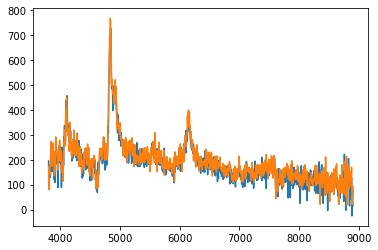

In [33]:
Spectra='J0156-2751.npy'
z=2.97
source=np.load(path+Spectra,allow_pickle=True)
wavelength=source[2]
flux=source[0]
x=wavelength
pos=np.where((x >3800) & (x <8900))
bright_flux=flux1=flux[0]
faint_flux=flux2=flux[1]
y1=flux1[pos]
y2=flux2[pos]
X=wavelength
x=X
x=x[pos]
#print(x)
plt.plot(x,y1)
plt.plot(x,y2)

J0124-6334.npy
1.3
['J0124-6334', 0, 0, 214.55958957795764, 150.92418478562462, 0, 0, 84, 83, 0, 0, 1909.130370031121, 2813.4086410398027]
['J0124-6334', 0, 0, 56.09691260805445, 50.14865433331508, 0, 0, 382, 177, 0, 0, 1895.0000000000002, 2785.0000000000005]


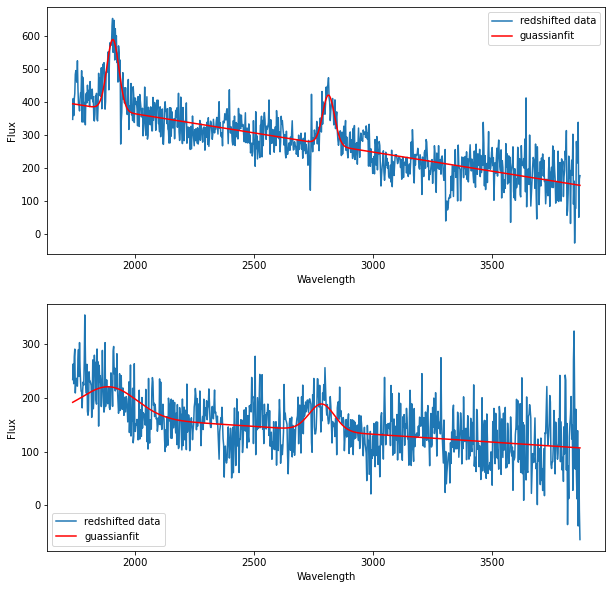

J0232-2429.npy
1.578
['J0232-2429', 0, 104.81228574318942, 61.081534049212536, 20.654584608919592, 0, 613, 148, -118, 0, 1535.0000000000002, 1896.6195891011914, 2813.1461930434175]
['J0232-2429', 0, 150.07528048723728, 99.78723641411386, 35.12574162340084, 0, 721, -95, 37, 0, 1535.0000000000002, 1901.294058054787, 2807.877782358579]


<Figure size 432x288 with 0 Axes>

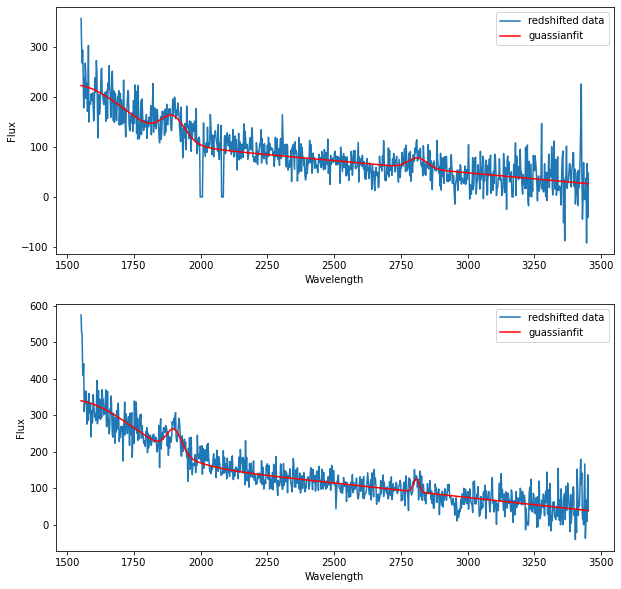

J0416-5606.npy
1.45
['J0416-5606', 0, -170.7325926173025, 187.33766464223226, 109.77050250955119, 0, 37, 88, 105, 0, 1542.668201922391, 1905.4327912202098, 2801.582819785513]
['J0416-5606', 0, 94.48763749305837, 79.30136814095886, -1.1599543364043825, 0, -385, 69, 0, 0, 1535.0439039587598, 1911.7913478235728, 2798.5703936366504]


<Figure size 432x288 with 0 Axes>

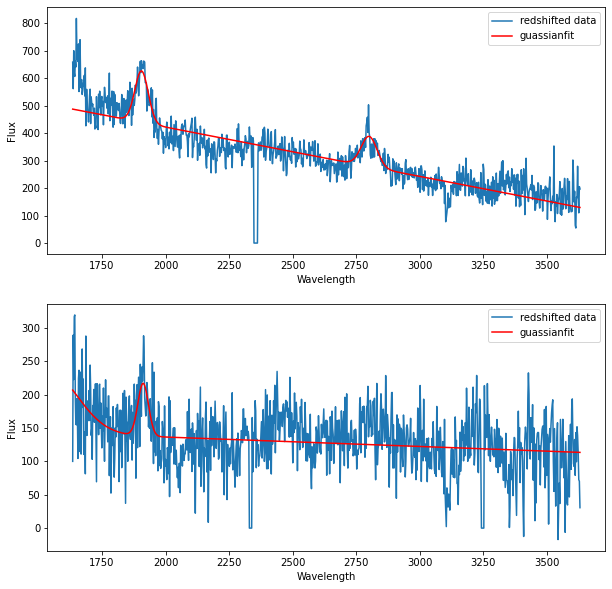

J2244-0550.npy
2.84
['J2244-0550', 1340.1801966323687, 388.8618607191638, 115.98939879440513, 0, -52, 61, 78, 0, 1227.8752667190238, 1542.9188344855306, 1901.8585434147462, 0]
['J2244-0550', 982.1667943743166, 327.40880626801516, 117.2385294375677, 0, -45, -55, -63, 0, 1225.9132549695057, 1548.1404906459209, 1910.7218924363865, 0]


<Figure size 432x288 with 0 Axes>

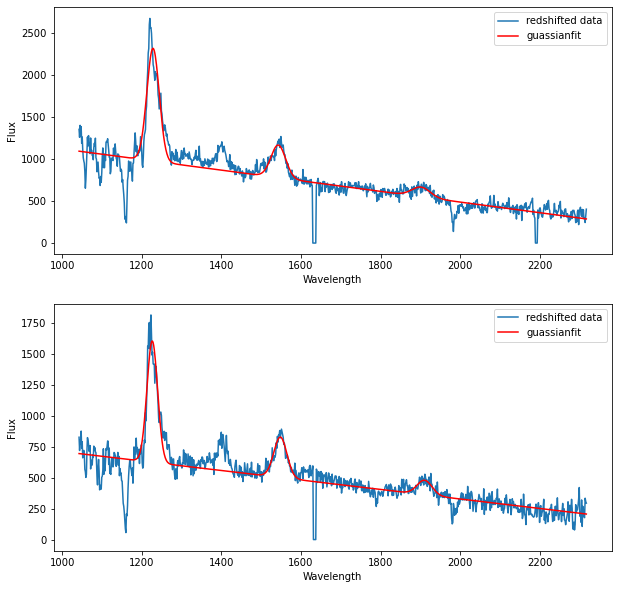

J1036-8544.npy
1.09
['J1036-8544', 0, 0, 73.33407032631888, 140.87402493511053, 0, 0, -4, 1790, 0, 0, 1895.0086359941065, 2785.0000000000086]
['J1036-8544', 0, 0, 6580.801662750324, 161.47002361310174, 0, 0, -12, 1763, 0, 0, 1903.558757587998, 2785.0000000000005]


<Figure size 432x288 with 0 Axes>

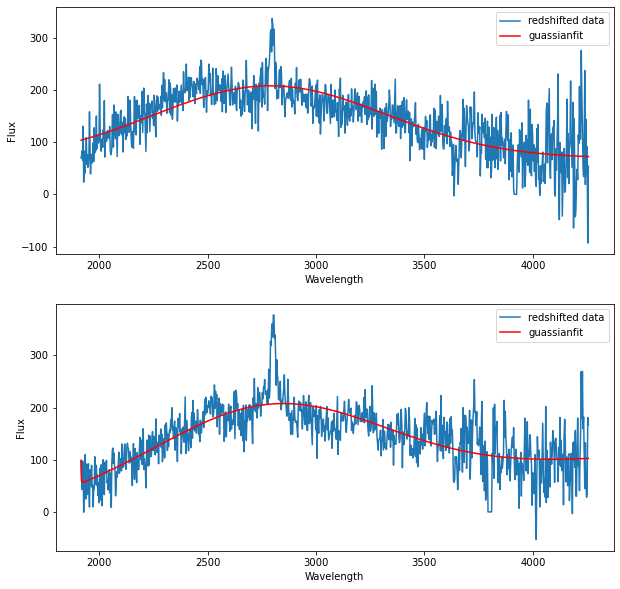

J0247-6349.npy
2.295
['J0247-6349', 1095.4184106138941, 1110.4606213664397, 1024.1283130102884, 0, 71, 41, -7293, 0, 1217.785439872751, 1550.3280144964542, 1895.0000000000011, 0]
['J0247-6349', -76.91248981678999, 283.2767169470691, 137.4911557216879, 0, 0, 52, 112, 0, 1220.1119371178138, 1550.1038207203428, 1895.0000000000002, 0]


<Figure size 432x288 with 0 Axes>

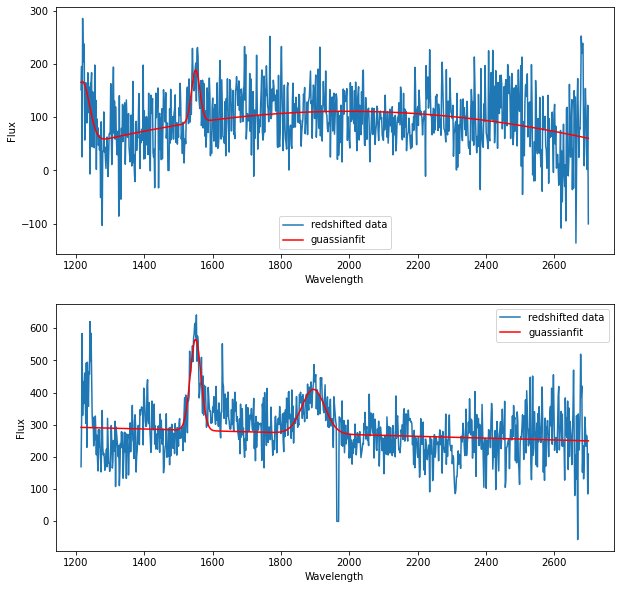

J2213-5926.npy
1.72
['J2213-5926', 0, 50.28398316350996, 79.35074933022017, 55.22375481248184, 0, 58, -9, 1243, 0, 1546.3665742422718, 1906.6292871985725, 2785.0000000000005]
['J2213-5926', 0, 104.97965275925998, 111.11496474641928, 50.94334910554102, 0, 42, 57, -196, 0, 1554.752987049026, 1904.2946279535488, 2789.029895794224]


<Figure size 432x288 with 0 Axes>

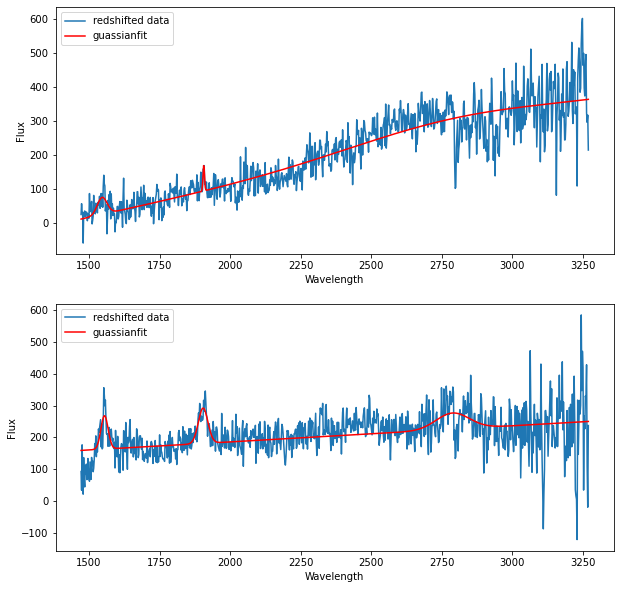

J2341-1557.npy
1.535
['J2341-1557', 0, 91.16265712980831, 92.96740910836601, 80.85589249354476, 0, 426, 86, 59, 0, 1535.000000000034, 1908.1604174224997, 2796.8123999030754]
['J2341-1557', 0, 214.74355108049286, 102.9659633499929, -216.0698867536478, 0, -394, 387, -9, 0, 1535.0000000000002, 1895.0000000000002, 2795.044559055362]


<Figure size 432x288 with 0 Axes>

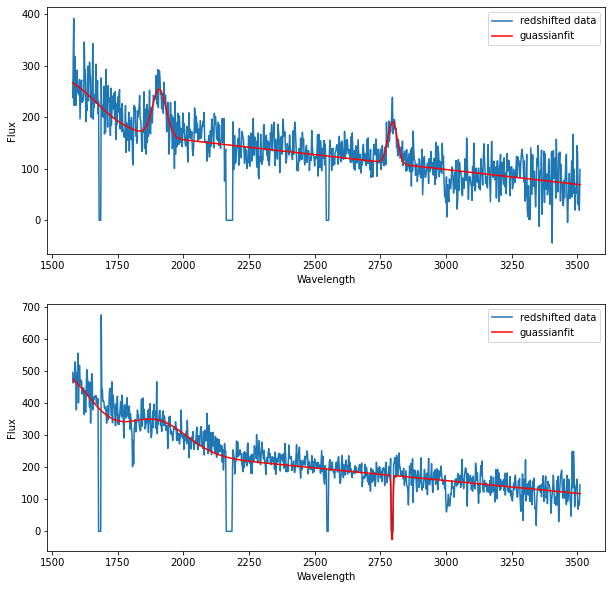

<Figure size 432x288 with 0 Axes>

In [85]:
DF=pd.read_csv('error.csv',header=0)


Spectra=DF.Spectra
z=DF.z
name=DF.Name
for i in range(0,len(DF)): 
    
    source=np.load(path+Spectra[i],allow_pickle=True)  
    print(Spectra[i])
    z=DF.z[i]
    print(z)
    wavelength=source[2]
    flux=source[0]
    bright_flux=flux1=flux[0]
    faint_flux=flux2=flux[1]
    fig, ax=plt.subplots(2,1,figsize=(10,10))
###BRIGHT SPECTRUM---------------------------------------------------------------------------------------
    x=wavelength
    pos=np.where((x >4000) & (x <8900)) 
    X=wavelength[pos]
    
    x=X/(z+1)
    y1=flux1[pos]
    x= np.nan_to_num(x)
    y1= np.nan_to_num(y1)        
    med1=statistics.median(y1) 
    y2=flux2[pos]
    x= np.nan_to_num(x)
    y2= np.nan_to_num(y2)
    med2=statistics.median(y2)
    
    if ((z>=2) and (z<=2.178)):
    
        p01=[med1,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1] #change this when : Optimal parameters not found:
                                             #Number of calls to function has reached maxfev = 1800.
        popt1,pcov1= curve_fit(gauss4,x,y1,p0=p01,
            bounds=[[-np.inf,-np.inf,-np.inf,1200,-np.inf,-np.inf,1535,-np.inf,-np.inf,1895,-np.inf,-np.inf,2785,-np.inf]
            ,[np.inf,np.inf,np.inf,1230,np.inf,np.inf,1565,np.inf,np.inf,1915,np.inf,np.inf,2815,np.inf]])
        FWHM_LyA1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[10])
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[13])


        LyA_low1=(popt1[0]+popt1[1]*popt1[3])
        LyA_high1=(gauss4(popt1[3],*popt1))    
        LyA_dif1=LyA_high1-LyA_low1

        CIV_low1=(popt1[0]+popt1[1]*popt1[6])
        CIV_high1=(gauss4(popt1[6],*popt1))    
        CIV_dif1=CIV_high1-CIV_low1
        
        CIII_low1=(popt1[0]+popt1[1]*popt1[9])
        CIII_high1=(gauss4(popt1[9],*popt1))    
        CIII_dif1=CIII_high1-CIII_low1
    
        MgII_low1=(popt1[0]+popt1[1]*popt1[12])
        MgII_high1=(gauss4(popt1[12],*popt1))    
        MgII_dif1=MgII_high1-MgII_low1
                   
      #  print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
      #    'CIV_Conti','CIII_Conti','MgII_Conti')
        value1=[name[i],LyA_dif1,CIV_dif1,CIII_dif1,MgII_dif1,FWHM_LyA1,FWHM_CIV1,FWHM_CIII1,FWHM_MgII1,popt1[3],popt1[6],
          popt1[9],popt1[12]]
        print(value1)
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss4(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1] #change this when : Optimal parameters not found:
                                                 #Number of calls to function has reached maxfev = 1800.
        popt2,pcov2= curve_fit(gauss4,x,y2,p0=p02,
        bounds=[[-np.inf,-np.inf,-np.inf,1200,-np.inf,-np.inf,1535,-np.inf,-np.inf,1895,-np.inf,-np.inf,2785,
                 -np.inf]
                 ,[np.inf,np.inf,np.inf,1230,np.inf,np.inf,1565,np.inf,np.inf,1920,np.inf,np.inf,2815,np.inf]])

        FWHM_LyA2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[10])
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[13])


        LyA_low2=(popt2[0]+popt2[1]*popt2[3])
        LyA_high2=(gauss4(popt2[3],*popt2))    
        LyA_dif2=LyA_high2-LyA_low2

        CIV_low2=(popt2[0]+popt2[1]*popt2[6])
        CIV_high2=(gauss4(popt2[6],*popt2))    
        CIV_dif2=CIV_high2-CIV_low2
    
        CIII_low2=(popt2[0]+popt2[1]*popt2[9])
        CIII_high2=(gauss4(popt2[9],*popt2))    
        CIII_dif2=CIII_high2-CIII_low2
    
        MgII_low2=(popt2[0]+popt2[1]*popt2[12])
        MgII_high2=(gauss4(popt2[12],*popt2))    
        MgII_dif2=MgII_high2-MgII_low2
               
     #   print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
     #     'CIV_Conti','CIII_Conti','MgII_Conti')
        value2=[name[i],LyA_dif2,CIV_dif2,CIII_dif2,MgII_dif2,FWHM_LyA2,FWHM_CIV2,FWHM_CIII2,FWHM_MgII2,
               popt2[3],popt2[6],popt2[9],popt2[12]]
        print(value2)
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss4(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        
        
        
        
        
        
    elif ((z>=1.42) and (z<=2.178)):
        p01=[med1,1,10,1549,1,10,1908,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss3,x,y1,p0=p01,
            bounds=[[-np.inf,-np.inf,-np.inf,1535,-np.inf,-np.inf,1895,-np.inf,-np.inf,2785,-np.inf],
                    [np.inf,np.inf,np.inf,1565,np.inf,np.inf,1920,np.inf,np.inf,2815,np.inf]])
        
        
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[10])



        CIV_low1=(popt1[0]+popt1[1]*popt1[3])
        CIV_high1=(gauss3(popt1[3],*popt1))    
        CIV_dif1=CIV_high1-CIV_low1
    
        CIII_low1=(popt1[0]+popt1[1]*popt1[6])
        CIII_high1=(gauss3(popt1[6],*popt1))    
        CIII_dif1=CIII_high1-CIII_low1
    
        MgII_low1=(popt1[0]+popt1[1]*popt1[9])
        MgII_high1=(gauss3(popt1[9],*popt1))    
        MgII_dif1=MgII_high1-MgII_low1
               
      #  print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
      #    'CIV_Conti','CIII_Conti','MgII_Conti')
        value1=[name[i],0,CIV_dif1,CIII_dif1,MgII_dif1,0,FWHM_CIV1,FWHM_CIII1,FWHM_MgII1,0,
                popt1[3],popt1[6],popt1[9]]
        print(value1)
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss3(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1549,1,10,1908,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss3,x,y2,p0=p02,
                    bounds=[[-np.inf,-np.inf,-np.inf,1535,-np.inf,-np.inf,1895,-np.inf,-np.inf,2785,-np.inf],
                            [np.inf,np.inf,np.inf,1565,np.inf,np.inf,1920,np.inf,np.inf,2815,np.inf]])

        
        
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[10])



        CIV_low2=(popt2[0]+popt2[1]*popt2[3])
        CIV_high2=(gauss3(popt2[3],*popt2))    
        CIV_dif2=CIV_high2-CIV_low2
    
        CIII_low2=(popt2[0]+popt2[1]*popt2[6])
        CIII_high2=(gauss3(popt2[6],*popt2))    
        CIII_dif2=CIII_high2-CIII_low2
    
        MgII_low2=(popt2[0]+popt2[1]*popt2[9])
        MgII_high2=(gauss3(popt2[9],*popt2))    
        MgII_dif2=MgII_high2-MgII_low2
               
        #print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
        #  'CIV_Conti','CIII_Conti','MgII_Conti')
        value2=[name[i],0,CIV_dif2,CIII_dif2,MgII_dif2,0,FWHM_CIV2,FWHM_CIII2,FWHM_MgII2,0,popt2[3],popt2[6]
                ,popt2[9]]
        print(value2)
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss3(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        
        
        
    
    elif ((z>=2.092) and (z<=3.664)):
        p01=[med1,1,10,1215,1,10,1549,1,10,1908,1] 
        popt1,pcov1= curve_fit(gauss3,x,y1,p0=p01,
        bounds=[[-np.inf,-np.inf,-np.inf,1200,-np.inf,-np.inf,1535,-np.inf,-np.inf,1895,-np.inf],
                [np.inf,np.inf,np.inf,1230,np.inf,np.inf,1565,np.inf,np.inf,1925,np.inf]])
        
        FWHM_LyA1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[10])


        LyA_low1=(popt1[0]+popt1[1]*popt1[3])
        LyA_high1=(gauss3(popt1[3],*popt1))    
        LyA_dif1=LyA_high1-LyA_low1

        CIV_low1=(popt1[0]+popt1[1]*popt1[6])
        CIV_high1=(gauss3(popt1[6],*popt1))    
        CIV_dif1=CIV_high1-CIV_low1
    
        CIII_low1=(popt1[0]+popt1[1]*popt1[9])
        CIII_high1=(gauss3(popt1[9],*popt1))    
        CIII_dif1=CIII_high1-CIII_low1
    
     #   print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
     #     'CIV_Conti','CIII_Conti','MgII_Conti')
        value1=[name[i],LyA_dif1,CIV_dif1,CIII_dif1,0,FWHM_LyA1,FWHM_CIV1,FWHM_CIII1,0,popt1[3],popt1[6],
                popt1[9],0]
        print(value1)
   # print(value)
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss3(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1215,1,10,1549,1,10,1908,1]
        popt2,pcov2= curve_fit(gauss3,x,y2,p0=p02,
                    bounds=[[-np.inf,-np.inf,-np.inf,1200,-np.inf,-np.inf,1535,-np.inf,-np.inf,1895,-np.inf]
                                    ,[np.inf,np.inf,np.inf,1230,np.inf,np.inf,1565,np.inf,np.inf,1925,np.inf]])

        
        FWHM_LyA2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[10])


        LyA_low2=(popt2[0]+popt2[1]*popt2[3])
        LyA_high2=(gauss3(popt2[3],*popt2))    
        LyA_dif2=LyA_high2-LyA_low2

        CIV_low2=(popt2[0]+popt2[1]*popt2[6])
        CIV_high2=(gauss3(popt2[6],*popt2))    
        CIV_dif2=CIV_high2-CIV_low2
        
        CIII_low2=(popt2[0]+popt2[1]*popt2[9])
        CIII_high2=(gauss3(popt2[9],*popt2))    
        CIII_dif2=CIII_high2-CIII_low2
    
       # print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
       #   'CIV_Conti','CIII_Conti','MgII_Conti')
        value2=[name[i],LyA_dif2,CIV_dif2,CIII_dif2,0,FWHM_LyA2,FWHM_CIV2,FWHM_CIII2,0,popt2[3],popt2[6]
                ,popt2[9],0]
   
        print(value2)
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss3(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        
    elif ((z>=0.9) and (z<=2.178)):
        p01=[med1,1,10,1908,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss2,x,y1,p0=p01,bounds=[[-np.inf,-np.inf,-np.inf,1895,-np.inf,-np.inf,2785,-np.inf],
                        [np.inf,np.inf,np.inf,1920,np.inf,np.inf,2815,np.inf]])
        
        
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[7])


        CIII_low1=(popt1[0]+popt1[1]*popt1[3])
        CIII_high1=(gauss2(popt1[3],*popt1))    
        CIII_dif1=CIII_high1-CIII_low1

        MgII_low1=(popt1[0]+popt1[1]*popt1[6])
        MgII_high1=(gauss2(popt1[6],*popt1))    
        MgII_dif1=MgII_high1-MgII_low1
    
        
     #   print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
     #     'CIV_Conti','CIII_Conti','MgII_Conti')
        value1=[name[i],0,0,CIII_dif1,MgII_dif1,0,0,FWHM_CIII1,FWHM_MgII1,0,0,popt1[3],popt1[6]]
        print(value1)
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss2(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,0,10,1908,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss2,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,1895,-np.inf,-np.inf,2785,-np.inf]
                                                         ,[np.inf,np.inf,np.inf,1920,np.inf,np.inf,2815,np.inf]])
                
        
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[7])


        CIII_low2=(popt2[0]+popt2[1]*popt2[3])
        CIII_high2=(gauss2(popt2[3],*popt2))    
        CIII_dif2=CIII_high2-CIII_low2

        MgII_low2=(popt2[0]+popt2[1]*popt2[6])
        MgII_high2=(gauss2(popt2[6],*popt2))    
        MgII_dif2=MgII_high2-MgII_low2
    
        
    
       # print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
          #'CIV_Conti','CIII_Conti','MgII_Conti')
        value2=[name[i],0,0,CIII_dif2,MgII_dif2,0,0,FWHM_CIII2,FWHM_MgII2,0,0,popt2[3],popt2[6]]
        print(value2)
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss2(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        
        
        
        
    elif ((z>=1.42) and (z<=3.6)):
        p01=[med1,1,10,1549,1,10,1908,1]
        popt1,pcov1= curve_fit(gauss2,x,y1,p0=p01,bounds=[[-np.inf,np.inf,-np.inf,1535,np.inf,np.inf,1895,np.inf]
                        ,[np.inf,np.inf,np.inf,1565,np.inf,np.inf,np.inf,1925,np.inf]])
        
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[7])


        CIV_low1=(popt1[0]+popt1[1]*popt1[3])
        CIV_high1=(gauss2(popt1[3],*popt1))    
        CIV_dif1=CIV_high1-CIV_low1

        CIII_low1=(popt1[0]+popt1[1]*popt1[6])
        CIII_high1=(gauss2(popt1[6],*popt1))    
        CIII_dif1=CIII_high1-CIII_low1    
        
    
       # print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
       #   'CIV_Conti','CIII_Conti','MgII_Conti')
        value1=[name[i],0,CIV_dif1,CIII_dif1,0,0,FWHM_CIV1,FWHM_CIII1,0,0,popt1[3],popt1[6],0]
        print(value1)
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss2(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,0,10,1549,1,10,1908,1]
        popt2,pcov2= curve_fit(gauss2,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,1535,-np.inf,-np.inf,1895,-np.inf],
                                                         [np.inf,np.inf,np.inf,1565,np.inf,np.inf,np.inf,1925,np.inf]])
        
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[7])


        CIV_low2=(popt2[0]+popt2[1]*popt2[3])
        CIV_high2=(gauss2(popt2[3],*popt2))    
        CIV_dif2=CIV_high2-CIV_low2

        CIII_low2=(popt2[0]+popt2[1]*popt2[6])
        CIII_high2=(gauss2(popt2[6],*popt2))    
        CIII_dif2=CIII_high2-CIII_low2
    
        
    
     #   print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
      #    'CIV_Conti','CIII_Conti','MgII_Conti')
        value2=[name[i],0,CIV_dif2,CIII_dif2,0,0,FWHM_CIV2,FWHM_CIII2,0,0,popt2[3],popt2[6],0]
        print(value2)
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss2(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
    
    elif ((z>=0.34) and (z<=2.178)):
        p01=[med1,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss1,x,y1,p0=p01,bounds=[[-np.inf,-np.inf,-np.inf,2785,-np.inf],
                                                         [np.inf,np.inf,np.inf,2815,np.inf]])
        
          
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[4])


        MgII_low1=(popt1[0]+popt1[1]*popt1[3])
        MgII_high1=(gauss1(popt1[3],*popt1))    
        MgII_dif1=MgII_high1-MgII_low1
    
    
       # print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
       #   'CIV_Conti','CIII_Conti','MgII_Conti')
        value1=[name[i],0,0,0,MgII_dif1,0,0,0,FWHM_MgII1,0,0,0,popt1[3]]
        print(value1)
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss1(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()  
        p02=[med2,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss1,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,2785,-np.inf],
                                                         [np.inf,np.inf,np.inf,2815,np.inf]])
            
          
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt1[4])


        MgII_low2=(popt2[0]+popt2[1]*popt2[3])
        MgII_high2=(gauss1(popt2[3],*popt2))    
        MgII_dif2=MgII_high2-MgII_low2
    
    
     
     #   print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
          #'CIV_Conti','CIII_Conti','MgII_Conti')
        value2=[name[i],0,0,0,MgII_dif2,0,0,0,FWHM_MgII2,0,0,0,popt2[3]]
        print(value2)
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss1(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
    
    

    
    
        
#     with open('CSVFILE_bright.csv', 'a', newline='',) as f_object:
#         writer_object = csv.writer(f_object)
#         writer_object.writerow(value1)  
#         f_object.close()
#     with open('CSVFILE_faint.csv', 'a', newline='',) as f_object:
#         writer_object = csv.writer(f_object)
#         writer_object.writerow(value2)  
#         f_object.close()
    

#     plt.savefig(path+name[i]+'.png')
    plt.show()
    plt.clf()

In [ ]:
Spectra=
z=DF.z

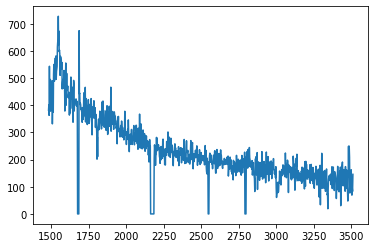

J2341-1557.npy
1.535
['J2341-1557', 0, 392.2171877705187, 79.07473000805783, 80.19064930386102, 0, -44, 61, -57, 0, 1550.9378992052784, 1908.0679188102097, 2796.959670968641]


RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

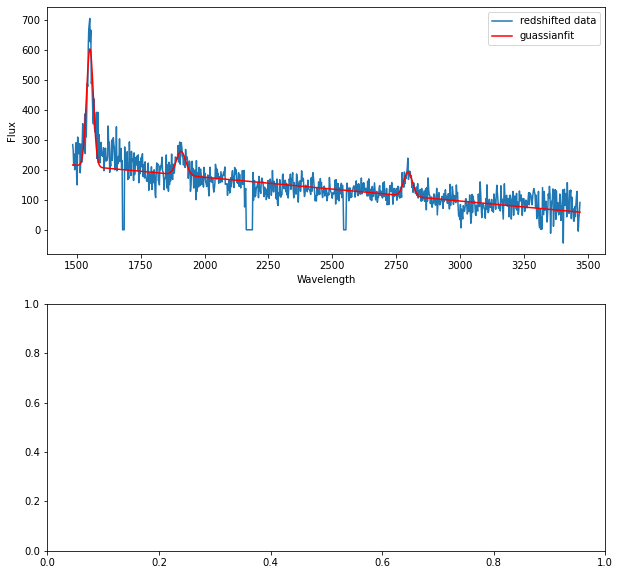

In [82]:
DF=pd.read_csv('error.csv',header=0)
Spectra=DF.Spectra
z=DF.z
name=DF.Name
for i in range(0,len(DF)): 
    i=7
    source=np.load(path+Spectra[i],allow_pickle=True)  
    print(Spectra[i])
    z=DF.z[i]
    print(z)
    wavelength=source[2]
    flux=source[0]
    bright_flux=flux1=flux[0]
    faint_flux=flux2=flux[1]
    fig, ax=plt.subplots(2,1,figsize=(10,10))
###BRIGHT SPECTRUM---------------------------------------------------------------------------------------
    x=wavelength
    pos=np.where((x >3760) & (x <8800)) 
    X=wavelength[pos]
    
    x=X/(z+1)
    y1=flux1[pos]
    x= np.nan_to_num(x)
    y1= np.nan_to_num(y1)        
    med1=statistics.median(y1) 
    y2=flux2[pos]
    x= np.nan_to_num(x)
    y2= np.nan_to_num(y2)
    med2=statistics.median(y2)
    
    if ((z>=2) and (z<=2.178)):
    
        p01=[med1,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1] #change this when : Optimal parameters not found:
                                             #Number of calls to function has reached maxfev = 1800.
        popt1,pcov1= curve_fit(gauss4,x,y1,p0=p01,
            bounds=[[-np.inf,-np.inf,-np.inf,1200,-np.inf,-np.inf,1535,-np.inf,-np.inf,1895,-np.inf,-np.inf,2785,-np.inf]
            ,[np.inf,np.inf,np.inf,1230,np.inf,np.inf,1565,np.inf,np.inf,1915,np.inf,np.inf,2815,np.inf]])
        FWHM_LyA1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[10])
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[13])


        LyA_low1=(popt1[0]+popt1[1]*popt1[3])
        LyA_high1=(gauss4(popt1[3],*popt1))    
        LyA_dif1=LyA_high1-LyA_low1

        CIV_low1=(popt1[0]+popt1[1]*popt1[6])
        CIV_high1=(gauss4(popt1[6],*popt1))    
        CIV_dif1=CIV_high1-CIV_low1
        
        CIII_low1=(popt1[0]+popt1[1]*popt1[9])
        CIII_high1=(gauss4(popt1[9],*popt1))    
        CIII_dif1=CIII_high1-CIII_low1
    
        MgII_low1=(popt1[0]+popt1[1]*popt1[12])
        MgII_high1=(gauss4(popt1[12],*popt1))    
        MgII_dif1=MgII_high1-MgII_low1
                   
      #  print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
      #    'CIV_Conti','CIII_Conti','MgII_Conti')
        value1=[name[i],LyA_dif1,CIV_dif1,CIII_dif1,MgII_dif1,FWHM_LyA1,FWHM_CIV1,FWHM_CIII1,FWHM_MgII1,popt1[3],popt1[6],
          popt1[9],popt1[12]]
        print(value1)
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss4(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1] #change this when : Optimal parameters not found:
                                                 #Number of calls to function has reached maxfev = 1800.
        popt2,pcov2= curve_fit(gauss4,x,y2,p0=p02,
        bounds=[[-np.inf,-np.inf,-np.inf,1200,-np.inf,-np.inf,1535,-np.inf,-np.inf,1895,-np.inf,-np.inf,2785,
                 -np.inf]
                 ,[np.inf,np.inf,np.inf,1230,np.inf,np.inf,1565,np.inf,np.inf,1920,np.inf,np.inf,2815,np.inf]])

        FWHM_LyA2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[10])
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[13])


        LyA_low2=(popt2[0]+popt2[1]*popt2[3])
        LyA_high2=(gauss4(popt2[3],*popt2))    
        LyA_dif2=LyA_high2-LyA_low2

        CIV_low2=(popt2[0]+popt2[1]*popt2[6])
        CIV_high2=(gauss4(popt2[6],*popt2))    
        CIV_dif2=CIV_high2-CIV_low2
    
        CIII_low2=(popt2[0]+popt2[1]*popt2[9])
        CIII_high2=(gauss4(popt2[9],*popt2))    
        CIII_dif2=CIII_high2-CIII_low2
    
        MgII_low2=(popt2[0]+popt2[1]*popt2[12])
        MgII_high2=(gauss4(popt2[12],*popt2))    
        MgII_dif2=MgII_high2-MgII_low2
               
     #   print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
     #     'CIV_Conti','CIII_Conti','MgII_Conti')
        value2=[name[i],LyA_dif2,CIV_dif2,CIII_dif2,MgII_dif2,FWHM_LyA2,FWHM_CIV2,FWHM_CIII2,FWHM_MgII2,
               popt2[3],popt2[6],popt2[9],popt2[12]]
        print(value2)
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss4(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        
        
        
        
        
        
    elif ((z>=1.42) and (z<=2.178)):
        p01=[med1,1,10,1549,1,10,1908,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss3,x,y1,p0=p01,
            bounds=[[-np.inf,-np.inf,-np.inf,1535,-np.inf,-np.inf,1895,-np.inf,-np.inf,2785,-np.inf],
                    [np.inf,np.inf,np.inf,1565,np.inf,np.inf,1920,np.inf,np.inf,2815,np.inf]])
        
        
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[10])



        CIV_low1=(popt1[0]+popt1[1]*popt1[3])
        CIV_high1=(gauss3(popt1[3],*popt1))    
        CIV_dif1=CIV_high1-CIV_low1
    
        CIII_low1=(popt1[0]+popt1[1]*popt1[6])
        CIII_high1=(gauss3(popt1[6],*popt1))    
        CIII_dif1=CIII_high1-CIII_low1
    
        MgII_low1=(popt1[0]+popt1[1]*popt1[9])
        MgII_high1=(gauss3(popt1[9],*popt1))    
        MgII_dif1=MgII_high1-MgII_low1
               
      #  print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
      #    'CIV_Conti','CIII_Conti','MgII_Conti')
        value1=[name[i],0,CIV_dif1,CIII_dif1,MgII_dif1,0,FWHM_CIV1,FWHM_CIII1,FWHM_MgII1,0,
                popt1[3],popt1[6],popt1[9]]
        print(value1)
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss3(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1549,1,10,1908,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss3,x,y2,p0=p02,
                    bounds=[[-np.inf,-np.inf,-np.inf,1535,-np.inf,-np.inf,1895,-np.inf,-np.inf,2785,-np.inf],
                            [np.inf,np.inf,np.inf,1565,np.inf,np.inf,1920,np.inf,np.inf,2815,np.inf]])

        
        
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[10])



        CIV_low2=(popt2[0]+popt2[1]*popt2[3])
        CIV_high2=(gauss3(popt2[3],*popt2))    
        CIV_dif2=CIV_high2-CIV_low2
    
        CIII_low2=(popt2[0]+popt2[1]*popt2[6])
        CIII_high2=(gauss3(popt2[6],*popt2))    
        CIII_dif2=CIII_high2-CIII_low2
    
        MgII_low2=(popt2[0]+popt2[1]*popt2[9])
        MgII_high2=(gauss3(popt2[9],*popt2))    
        MgII_dif2=MgII_high2-MgII_low2
               
        #print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
        #  'CIV_Conti','CIII_Conti','MgII_Conti')
        value2=[name[i],0,CIV_dif2,CIII_dif2,MgII_dif2,0,FWHM_CIV2,FWHM_CIII2,FWHM_MgII2,0,popt2[3],popt2[6]
                ,popt2[9]]
        print(value2)
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss3(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        
        
        
    
    elif ((z>=2.092) and (z<=3.664)):
        p01=[med1,1,10,1215,1,10,1549,1,10,1908,1] 
        popt1,pcov1= curve_fit(gauss3,x,y1,p0=p01,
        bounds=[[-np.inf,-np.inf,-np.inf,1200,-np.inf,-np.inf,1535,-np.inf,-np.inf,1895,-np.inf],
                [np.inf,np.inf,np.inf,1230,np.inf,np.inf,1565,np.inf,np.inf,1925,np.inf]])
        
        FWHM_LyA1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[10])


        LyA_low1=(popt1[0]+popt1[1]*popt1[3])
        LyA_high1=(gauss3(popt1[3],*popt1))    
        LyA_dif1=LyA_high1-LyA_low1

        CIV_low1=(popt1[0]+popt1[1]*popt1[6])
        CIV_high1=(gauss3(popt1[6],*popt1))    
        CIV_dif1=CIV_high1-CIV_low1
    
        CIII_low1=(popt1[0]+popt1[1]*popt1[9])
        CIII_high1=(gauss3(popt1[9],*popt1))    
        CIII_dif1=CIII_high1-CIII_low1
    
     #   print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
     #     'CIV_Conti','CIII_Conti','MgII_Conti')
        value1=[name[i],LyA_dif1,CIV_dif1,CIII_dif1,0,FWHM_LyA1,FWHM_CIV1,FWHM_CIII1,0,popt1[3],popt1[6],
                popt1[9],0]
        print(value1)
   # print(value)
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss3(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1215,1,10,1549,1,10,1908,1]
        popt2,pcov2= curve_fit(gauss3,x,y2,p0=p02,
                    bounds=[[-np.inf,-np.inf,-np.inf,1200,-np.inf,-np.inf,1535,-np.inf,-np.inf,1895,-np.inf]
                                    ,[np.inf,np.inf,np.inf,1230,np.inf,np.inf,1565,np.inf,np.inf,1925,np.inf]])

        
        FWHM_LyA2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[10])


        LyA_low2=(popt2[0]+popt2[1]*popt2[3])
        LyA_high2=(gauss3(popt2[3],*popt2))    
        LyA_dif2=LyA_high2-LyA_low2

        CIV_low2=(popt2[0]+popt2[1]*popt2[6])
        CIV_high2=(gauss3(popt2[6],*popt2))    
        CIV_dif2=CIV_high2-CIV_low2
        
        CIII_low2=(popt2[0]+popt2[1]*popt2[9])
        CIII_high2=(gauss3(popt2[9],*popt2))    
        CIII_dif2=CIII_high2-CIII_low2
    
       # print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
       #   'CIV_Conti','CIII_Conti','MgII_Conti')
        value2=[name[i],LyA_dif2,CIV_dif2,CIII_dif2,0,FWHM_LyA2,FWHM_CIV2,FWHM_CIII2,0,popt2[3],popt2[6]
                ,popt2[9],0]
   
        print(value2)
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss3(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        
    elif ((z>=0.9) and (z<=2.178)):
        p01=[med1,1,10,1908,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss2,x,y1,p0=p01,bounds=[[-np.inf,-np.inf,-np.inf,1895,-np.inf,-np.inf,2785,-np.inf],
                        [np.inf,np.inf,np.inf,1920,np.inf,np.inf,2815,np.inf]])
        
        
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[7])


        CIII_low1=(popt1[0]+popt1[1]*popt1[3])
        CIII_high1=(gauss2(popt1[3],*popt1))    
        CIII_dif1=CIII_high1-CIII_low1

        MgII_low1=(popt1[0]+popt1[1]*popt1[6])
        MgII_high1=(gauss2(popt1[6],*popt1))    
        MgII_dif1=MgII_high1-MgII_low1
    
        
     #   print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
     #     'CIV_Conti','CIII_Conti','MgII_Conti')
        value1=[name[i],0,0,CIII_dif1,MgII_dif1,0,0,FWHM_CIII1,FWHM_MgII1,0,0,popt1[3],popt1[6]]
        print(value1)
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss2(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,0,10,1908,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss2,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,1895,-np.inf,-np.inf,2785,-np.inf]
                                                         ,[np.inf,np.inf,np.inf,1920,np.inf,np.inf,2815,np.inf]])
                
        
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[7])


        CIII_low2=(popt2[0]+popt2[1]*popt2[3])
        CIII_high2=(gauss2(popt2[3],*popt2))    
        CIII_dif2=CIII_high2-CIII_low2

        MgII_low2=(popt2[0]+popt2[1]*popt2[6])
        MgII_high2=(gauss2(popt2[6],*popt2))    
        MgII_dif2=MgII_high2-MgII_low2
    
        
    
       # print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
          #'CIV_Conti','CIII_Conti','MgII_Conti')
        value2=[name[i],0,0,CIII_dif2,MgII_dif2,0,0,FWHM_CIII2,FWHM_MgII2,0,0,popt2[3],popt2[6]]
        print(value2)
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss2(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        
        
        
        
    elif ((z>=1.42) and (z<=3.6)):
        p01=[med1,1,10,1549,1,10,1908,1]
        popt1,pcov1= curve_fit(gauss2,x,y1,p0=p01,bounds=[[-np.inf,np.inf,-np.inf,1535,np.inf,np.inf,1895,np.inf]
                        ,[np.inf,np.inf,np.inf,1565,np.inf,np.inf,np.inf,1925,np.inf]])
        
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[7])


        CIV_low1=(popt1[0]+popt1[1]*popt1[3])
        CIV_high1=(gauss2(popt1[3],*popt1))    
        CIV_dif1=CIV_high1-CIV_low1

        CIII_low1=(popt1[0]+popt1[1]*popt1[6])
        CIII_high1=(gauss2(popt1[6],*popt1))    
        CIII_dif1=CIII_high1-CIII_low1    
        
    
       # print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
       #   'CIV_Conti','CIII_Conti','MgII_Conti')
        value1=[name[i],0,CIV_dif1,CIII_dif1,0,0,FWHM_CIV1,FWHM_CIII1,0,0,popt1[3],popt1[6],0]
        print(value1)
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss2(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,0,10,1549,1,10,1908,1]
        popt2,pcov2= curve_fit(gauss2,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,1535,-np.inf,-np.inf,1895,-np.inf],
                                                         [np.inf,np.inf,np.inf,1565,np.inf,np.inf,np.inf,1925,np.inf]])
        
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[7])


        CIV_low2=(popt2[0]+popt2[1]*popt2[3])
        CIV_high2=(gauss2(popt2[3],*popt2))    
        CIV_dif2=CIV_high2-CIV_low2

        CIII_low2=(popt2[0]+popt2[1]*popt2[6])
        CIII_high2=(gauss2(popt2[6],*popt2))    
        CIII_dif2=CIII_high2-CIII_low2
    
        
    
     #   print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
      #    'CIV_Conti','CIII_Conti','MgII_Conti')
        value2=[name[i],0,CIV_dif2,CIII_dif2,0,0,FWHM_CIV2,FWHM_CIII2,0,0,popt2[3],popt2[6],0]
        print(value2)
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss2(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
    
    elif ((z>=0.34) and (z<=2.178)):
        p01=[med1,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss1,x,y1,p0=p01,bounds=[[-np.inf,-np.inf,-np.inf,2785,-np.inf],
                                                         [np.inf,np.inf,np.inf,2815,np.inf]])
        
          
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[4])


        MgII_low1=(popt1[0]+popt1[1]*popt1[3])
        MgII_high1=(gauss1(popt1[3],*popt1))    
        MgII_dif1=MgII_high1-MgII_low1
    
    
       # print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
       #   'CIV_Conti','CIII_Conti','MgII_Conti')
        value1=[name[i],0,0,0,MgII_dif1,0,0,0,FWHM_MgII1,0,0,0,popt1[3]]
        print(value1)
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss1(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()  
        p02=[med2,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss1,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,2785,-np.inf],
                                                         [np.inf,np.inf,np.inf,2815,np.inf]])
            
          
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt1[4])


        MgII_low2=(popt2[0]+popt2[1]*popt2[3])
        MgII_high2=(gauss1(popt2[3],*popt2))    
        MgII_dif2=MgII_high2-MgII_low2
    
    
     
     #   print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
          #'CIV_Conti','CIII_Conti','MgII_Conti')
        value2=[name[i],0,0,0,MgII_dif2,0,0,0,FWHM_MgII2,0,0,0,popt2[3]]
        print(value2)
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss1(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
    
    

    
    
        
    with open('CSVFILE_bright.csv', 'a', newline='',) as f_object:
        writer_object = csv.writer(f_object)
        writer_object.writerow(value1)  
        f_object.close()
    with open('CSVFILE_faint.csv', 'a', newline='',) as f_object:
        writer_object = csv.writer(f_object)
        writer_object.writerow(value2)  
        f_object.close()
    

    plt.savefig(path+name[i]+'.png')
    plt.show()
    plt.clf()


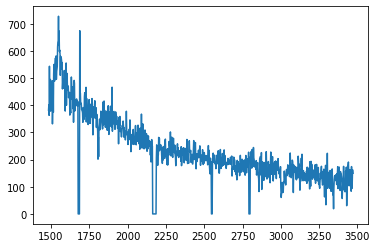

In [83]:
plt.plot(x,y2)
plt.show()

In [ ]:
def sd_calc(data):
    n = len(data)

    if n <= 1:
        return 0.0

    mean, sd = avg_calc(data), 0.0

    # calculate stan. dev.
    for el in data:
        sd += (float(el) - mean)**2
    sd = math.sqrt(sd / float(n-1))
    return sd
def avg_calc(ls):
    n, mean = len(ls), 0.0

    if n <= 1:
        return ls[0]

    # calculate average
    for el in ls:
        mean = mean + float(el)
    mean = mean / float(n)

    return mean


In [95]:
DF=pd.read_csv('WHT.csv',header=0)


42

J0045-3937.npy
1.85


NameError: 
Two models have parameters named 'a'; use distinct names.
Two models have parameters named 'p1_ga'; use distinct names.
Two models have parameters named 'c'; use distinct names.
Two models have parameters named 'p3_ga2'; use distinct names.
Two models have parameters named 'p2_gc1'; use distinct names.
Two models have parameters named 'p2_gb1'; use distinct names.
Two models have parameters named 'p1_gc'; use distinct names.
Two models have parameters named 'p3_gb2'; use distinct names.
Two models have parameters named 'p2_ga1'; use distinct names.
Two models have parameters named 'p3_gc2'; use distinct names.
Two models have parameters named 'p1_gb'; use distinct names.

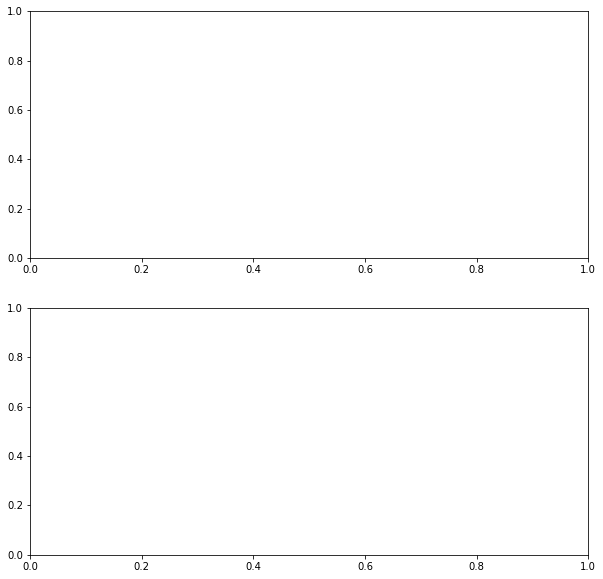

In [57]:
DF=pd.read_csv('NTT.csv',header=0)
Spectra=DF.Spectra
z=DF.z
name=DF.Name
i=0
source=np.load(path+Spectra[i],allow_pickle=True)  
print(Spectra[i])
z=DF.z[i]
print(z)
wavelength=source[2]
flux=source[0]
bright_flux=flux1=flux[0]
faint_flux=flux2=flux[1]
fig, ax=plt.subplots(2,1,figsize=(10,10))
###BRIGHT SPECTRUM---------------------------------------------------------------------------------------
x=wavelength
pos=np.where((x >4250) & (x <8800)) 
X=wavelength[pos]
    
x=X/(z+1)
y1=flux1[pos]
x= np.nan_to_num(x)
y1= np.nan_to_num(y1)        
med1=statistics.median(y1) 
y2=flux2[pos]
x= np.nan_to_num(x)
y2= np.nan_to_num(y2)
med2=statistics.median(y2)
    
if ((z>=2.14) and (z<=2.48)):
    
    p01=[med1,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1] #change this when : Optimal parameters not found:
                                             #Number of calls to function has reached maxfev = 1800.
    popt1,pcov1= curve_fit(gauss4,x,y1,p0=p01,absolute_sigma=True,
    bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0,
             -np.inf,2785,0]
            ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1915,50,np.inf,2815,50]])
    
    
    stdev1=statistics.stdev(y1)
    nexp1=gauss4(x,*popt1)
    N1=curve_fit(gauss4,x,y1)
    Nfluct1 = stdev1*np.random.normal(size=nobs)
    N1= N1 + Nfluct1
    
    r1= N1 - nexp
    chisq1 = np.sum((r1/stdev1)**2)
    
    print("chisq =",chisq1)
    
    FWHM_LyA1=round(2*np.sqrt(2*np.log(2))*popt1[4])
    FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[7])
    FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[10])
    FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[13])


    LyA_low1=(popt1[0]+popt1[1]*popt1[3])
    LyA_high1=(gauss4(popt1[3],*popt1))    
    LyA_dif1=LyA_high1-LyA_low1

    CIV_low1=(popt1[0]+popt1[1]*popt1[6])
    CIV_high1=(gauss4(popt1[6],*popt1))    
    CIV_dif1=CIV_high1-CIV_low1
        
    CIII_low1=(popt1[0]+popt1[1]*popt1[9])
    CIII_high1=(gauss4(popt1[9],*popt1))    
    CIII_dif1=CIII_high1-CIII_low1
    
    MgII_low1=(popt1[0]+popt1[1]*popt1[12])
    MgII_high1=(gauss4(popt1[12],*popt1))    
    MgII_dif1=MgII_high1-MgII_low1
                   
      #  print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
      #    'CIV_Conti','CIII_Conti','MgII_Conti')
    value1=[name[i],LyA_dif1,CIV_dif1,CIII_dif1,MgII_dif1,FWHM_LyA1,FWHM_CIV1,FWHM_CIII1,FWHM_MgII1,popt1[3],popt1[6],
          popt1[9],popt1[12]]
    print(value1)
    ax[0].plot(x,y1,label='redshifted data')
    ax[0].plot(x, gauss4(x, *popt1),'r', label='guassianfit')
    ax[0].set_xlabel('Wavelength')
    ax[0].set_ylabel('Flux')       
    ax[0].legend()
    p02=[med2,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1] #change this when : Optimal parameters not found:
                                                 #Number of calls to function has reached maxfev = 1800.
    popt2,pcov2= curve_fit(gauss4,x,y2,p0=p02,absolute_sigma=True,
    bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,
                 0]
                 ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])
    
    
    stdev2=statistics.stdev(y2)
    nexp2=gauss4(x,*popt2)
    N2=curve_fit(gauss4,x,y2)
    Nfluct2 = stdev2*np.random.normal(size=nobs)
    N2= N2 + Nfluct2
    
    r2= N2 - Nexp2
    chisq2 = np.sum((r2/stdev2)**2)
   
    print("chisq =",chisq2) 
    FWHM_LyA2=round(2*np.sqrt(2*np.log(2))*popt2[4])
    FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[7])
    FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[10])
    FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[13])


    LyA_low2=(popt2[0]+popt2[1]*popt2[3])
    LyA_high2=(gauss4(popt2[3],*popt2))    
    LyA_dif2=LyA_high2-LyA_low2

    CIV_low2=(popt2[0]+popt2[1]*popt2[6])
    CIV_high2=(gauss4(popt2[6],*popt2))    
    CIV_dif2=CIV_high2-CIV_low2
    
    CIII_low2=(popt2[0]+popt2[1]*popt2[9])
    CIII_high2=(gauss4(popt2[9],*popt2))    
    CIII_dif2=CIII_high2-CIII_low2
    
    MgII_low2=(popt2[0]+popt2[1]*popt2[12])
    MgII_high2=(gauss4(popt2[12],*popt2))    
    MgII_dif2=MgII_high2-MgII_low2
               
     #   print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
     #     'CIV_Conti','CIII_Conti','MgII_Conti')
    value2=[name[i],LyA_dif2,CIV_dif2,CIII_dif2,MgII_dif2,FWHM_LyA2,FWHM_CIV2,FWHM_CIII2,FWHM_MgII2,
               popt2[3],popt2[6],popt2[9],popt2[12]]
    print(value2)
    ax[1].plot(x,y2,label='redshifted data')
    ax[1].plot(x, gauss4(x, *popt2),'r', label='guassianfit')
    ax[1].set_xlabel('Wavelength')
    ax[1].set_ylabel('Flux')       
    ax[1].legend()
        
        
        
        
        
        
elif ((z>=1.743) and (z<=2.14)):
    p01=[med1,1,10,1549,1,10,1908,1,10,2800,1]
    popt1,pcov1= curve_fit(gauss3,x,y1,p0=p01,absolute_sigma=True,
        bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0],
                    [np.inf,np.inf,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])
    gmodel=Model(gauss3)+Model(gauss3)+Model(gauss3)
  
    
    
    params = gmodel.make_params(c=med1,a=1,ga=10,gb=1549,gc=1,ga1=10,gb1=1908,gc1=1,ga2=10,gb2=2800,gc2=1)
    result = gmodel.fit(y1,params,x=x)
#     stdev1=statistics.stdev(y1)
#     nexp1=gauss3(x,*popt1)
#     N1=curve_fit(gauss4,x,y1)
    
#     Nfluct1 = stdev1*np.random.normal(size=1)
#     print(N1[0])
#     print(nexp1)
    
#     r1= N1 - nexp1
#     chisq1 = np.sum((r1/stdev1)**2)
   
#     print("chisq =",chisq1) 
        
        
    FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[4])
    FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[7])
    FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[10])



    CIV_low1=(popt1[0]+popt1[1]*popt1[3])
    CIV_high1=(gauss3(popt1[3],*popt1))    
    CIV_dif1=CIV_high1-CIV_low1
    
    CIII_low1=(popt1[0]+popt1[1]*popt1[6])
    CIII_high1=(gauss3(popt1[6],*popt1))    
    CIII_dif1=CIII_high1-CIII_low1
    
    MgII_low1=(popt1[0]+popt1[1]*popt1[9])
    MgII_high1=(gauss3(popt1[9],*popt1))    
    MgII_dif1=MgII_high1-MgII_low1
               
      #  print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
      #    'CIV_Conti','CIII_Conti','MgII_Conti')
    value1=[name[i],0,CIV_dif1,CIII_dif1,MgII_dif1,0,FWHM_CIV1,FWHM_CIII1,FWHM_MgII1,0,
                popt1[3],popt1[6],popt1[9]]
    print(value1)
    ax[0].plot(x,y1,label='redshifted data')
    ax[0].plot(x, gauss3(x, *popt1),'r', label='guassianfit')
    ax[0].plot(x,result.best_fit,label='best fit')
    ax[0].set_xlabel('Wavelength')
    ax[0].set_ylabel('Flux')       
    ax[0].legend()
    p02=[med2,1,10,1549,1,10,1908,1,10,2800,1]
    popt2,pcov2= curve_fit(gauss3,x,y2,p0=p02,absolute_sigma=True,
                    bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0],
                            [np.inf,np.inf,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])
    gmodel=Model(gauss3)
  
    
    
    params = gmodel.make_params(c=med1,a=1,ga=10,gb=1549,gc=1,ga1=10,gb1=1908,gc1=1,ga2=10,gb2=2800,gc2=1)
    result = gmodel.fit(y1,params, x=x)
#     stdev2=statistics.stdev(y2)
#     nexp2=gauss3(x,*popt2)
#     N2=curve_fit(gauss4,x,y2)
#     Nfluct2 = stdev2*np.random.normal(size=nobs)
#     N2= N2 + Nfluct2
    
#     r2= N2 - Nexp2
#     chisq2 = np.sum((r2/stdev2)**2)
   
#     print("chisq =",chisq2) 
        
        
    FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[4])
    FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[7])
    FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[10])



    CIV_low2=(popt2[0]+popt2[1]*popt2[3])
    CIV_high2=(gauss3(popt2[3],*popt2))    
    CIV_dif2=CIV_high2-CIV_low2
    
    CIII_low2=(popt2[0]+popt2[1]*popt2[6])
    CIII_high2=(gauss3(popt2[6],*popt2))    
    CIII_dif2=CIII_high2-CIII_low2
    
    MgII_low2=(popt2[0]+popt2[1]*popt2[9])
    MgII_high2=(gauss3(popt2[9],*popt2))    
    MgII_dif2=MgII_high2-MgII_low2
               
        #print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
        #  'CIV_Conti','CIII_Conti','MgII_Conti')
    value2=[name[i],0,CIV_dif2,CIII_dif2,MgII_dif2,0,FWHM_CIV2,FWHM_CIII2,FWHM_MgII2,0,popt2[3],popt2[6]
                ,popt2[9]]
    print(value2)
    ax[1].plot(x,y2,label='redshifted data')
    ax[1].plot(x, gauss3(x, *popt2),'r', label='guassianfit')
    ax[1].set_xlabel('Wavelength')
    ax[1].set_ylabel('Flux')       
    ax[1].legend()
        
        
        
    
elif ((z>=2.48) and (z<=3.612)):
    p01=[med1,1,10,1215,1,10,1549,1,10,1908,1] 
    popt1,pcov1= curve_fit(gauss3,x,y1,p0=p01,absolute_sigma=True,
    bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0],
                [np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1925,50]])
    
    stdev1=statistics.stdev(y1)
    nexp1=gauss4(x,*popt1)
    N1=curve_fit(gauss4,x,y1)
    Nfluct1 = stdev1*np.random.normal(size=nobs)
    N1= N1 + Nfluct1
    
    r1= N1 - Nexp1
    chisq1 = np.sum((r1/stdev1)**2)
   
    print("chisq =",chisq1)  
    
    
    FWHM_LyA1=round(2*np.sqrt(2*np.log(2))*popt1[4])
    FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[7])
    FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[10])


    LyA_low1=(popt1[0]+popt1[1]*popt1[3])
    LyA_high1=(gauss3(popt1[3],*popt1))    
    LyA_dif1=LyA_high1-LyA_low1

    CIV_low1=(popt1[0]+popt1[1]*popt1[6])
    CIV_high1=(gauss3(popt1[6],*popt1))    
    CIV_dif1=CIV_high1-CIV_low1
    
    CIII_low1=(popt1[0]+popt1[1]*popt1[9])
    CIII_high1=(gauss3(popt1[9],*popt1))    
    CIII_dif1=CIII_high1-CIII_low1
    
     #   print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
     #     'CIV_Conti','CIII_Conti','MgII_Conti')
    value1=[name[i],LyA_dif1,CIV_dif1,CIII_dif1,0,FWHM_LyA1,FWHM_CIV1,FWHM_CIII1,0,popt1[3],popt1[6],
                popt1[9],0]
    print(value1)
   # print(value)
    ax[0].plot(x,y1,label='redshifted data')
    ax[0].plot(x, gauss3(x, *popt1),'r', label='guassianfit')
    ax[0].set_xlabel('Wavelength')
    ax[0].set_ylabel('Flux')       
    ax[0].legend()
    p02=[med2,1,10,1215,1,10,1549,1,10,1908,1]
    popt2,pcov2= curve_fit(gauss3,x,y2,p0=p02,absolute_sigma=True,
                    bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0]
                                    ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1925,50]])
    stdev2=statistics.stdev(y2)
    nexp2=gauss4(x,*popt2)
    N2=curve_fit(gauss4,x,y2)
    Nfluct2 = stdev2*np.random.normal(size=nobs)
    N2= N2 + Nfluct2
    
    r2= N2 - Nexp2
    chisq2 = np.sum((r2/stdev2)**2)
   
    print("chisq =",chisq2) 
        
    FWHM_LyA2=round(2*np.sqrt(2*np.log(2))*popt2[4])
    FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[7])
    FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[10])


    LyA_low2=(popt2[0]+popt2[1]*popt2[3])
    LyA_high2=(gauss3(popt2[3],*popt2))    
    LyA_dif2=LyA_high2-LyA_low2

    CIV_low2=(popt2[0]+popt2[1]*popt2[6])
    CIV_high2=(gauss3(popt2[6],*popt2))    
    CIV_dif2=CIV_high2-CIV_low2
        
    CIII_low2=(popt2[0]+popt2[1]*popt2[9])
    CIII_high2=(gauss3(popt2[9],*popt2))    
    CIII_dif2=CIII_high2-CIII_low2
    
       # print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
       #   'CIV_Conti','CIII_Conti','MgII_Conti')
    value2=[name[i],LyA_dif2,CIV_dif2,CIII_dif2,0,FWHM_LyA2,FWHM_CIV2,FWHM_CIII2,0,popt2[3],popt2[6]
                ,popt2[9],0]
   
    print(value2)
    ax[1].plot(x,y2,label='redshifted data')
    ax[1].plot(x, gauss3(x, *popt2),'r', label='guassianfit')
    ax[1].set_xlabel('Wavelength')
    ax[1].set_ylabel('Flux')       
    ax[1].legend()
        
elif ((z>=1.227) and (z<=2.14)):
    p01=[med1,1,10,1908,1,10,2800,1]
    popt1,pcov1= curve_fit(gauss2,x,y1,p0=p01,absolute_sigma=True,
                           bounds=[[-np.inf,-np.inf,-np.inf,1895,0,-np.inf,2785,0],
                        [np.inf,np.inf,np.inf,1920,50,np.inf,2815,50]])
    
    stdev1=statistics.stdev(y1)
    nexp1=gauss4(x,*popt1)
    N1=curve_fit(gauss4,x,y1)
    Nfluct1 = stdev1*np.random.normal(size=nobs)
    N1= N1 + Nfluct1
    
    r1= N1 - Nexp1
    chisq1 = np.sum((r1/stdev1)**2)
   
    print("chisq =",chisq1) 
        
    FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[4])
    FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[7])


    CIII_low1=(popt1[0]+popt1[1]*popt1[3])
    CIII_high1=(gauss2(popt1[3],*popt1))    
    CIII_dif1=CIII_high1-CIII_low1

    MgII_low1=(popt1[0]+popt1[1]*popt1[6])
    MgII_high1=(gauss2(popt1[6],*popt1))    
    MgII_dif1=MgII_high1-MgII_low1
    
        
     #   print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
     #     'CIV_Conti','CIII_Conti','MgII_Conti')
    value1=[name[i],0,0,CIII_dif1,MgII_dif1,0,0,FWHM_CIII1,FWHM_MgII1,0,0,popt1[3],popt1[6]]
    print(value1)
    ax[0].plot(x,y1,label='redshifted data')
    ax[0].plot(x, gauss2(x, *popt1),'r', label='guassianfit')
    ax[0].set_xlabel('Wavelength')
    ax[0].set_ylabel('Flux')       
    ax[0].legend()
    p02=[med2,0,10,1908,1,10,2800,1]
    popt2,pcov2= curve_fit(gauss2,x,y2,p0=p02,absolute_sigma=True,
                           bounds=[[-np.inf,-np.inf,-np.inf,1895,0,-np.inf,2785,0]
                            ,[np.inf,np.inf,np.inf,1920,50,np.inf,2815,50]])
                
    stdev2=statistics.stdev(y2)
    nexp2=gauss4(x,*popt2)
    N2=curve_fit(gauss4,x,y2)
    Nfluct2 = stdev2*np.random.normal(size=nobs)
    N2= N2 + Nfluct2
    
    r2= N2 - Nexp2
    chisq2 = np.sum((r2/stdev2)**2)
   
    print("chisq =",chisq2)     
    FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[4])
    FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[7])


    CIII_low2=(popt2[0]+popt2[1]*popt2[3])
    CIII_high2=(gauss2(popt2[3],*popt2))    
    CIII_dif2=CIII_high2-CIII_low2

    MgII_low2=(popt2[0]+popt2[1]*popt2[6])
    MgII_high2=(gauss2(popt2[6],*popt2))    
    MgII_dif2=MgII_high2-MgII_low2
    
        
    
       # print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
          #'CIV_Conti','CIII_Conti','MgII_Conti')
    value2=[name[i],0,0,CIII_dif2,MgII_dif2,0,0,FWHM_CIII2,FWHM_MgII2,0,0,popt2[3],popt2[6]]
    print(value2)
    ax[1].plot(x,y2,label='redshifted data')
    ax[1].plot(x, gauss2(x, *popt2),'r', label='guassianfit')
    ax[1].set_xlabel('Wavelength')
    ax[1].set_ylabel('Flux')       
    ax[1].legend()
        
        
        
        
elif ((z>=1.743) and (z<=3.612)):
    p01=[med1,1,10,1549,1,10,1908,1]
    popt1,pcov1= curve_fit(gauss2,x,y1,p0=p01,absolute_sigma=True,
                           bounds=[[-np.inf,np.inf,-np.inf,1535,0,np.inf,1895,0]
                        ,[np.inf,np.inf,np.inf,1565,50,np.inf,np.inf,1925,50]])
    stdev1=statistics.stdev(y1)
    nexp1=gauss4(x,*popt1)
    N1=curve_fit(gauss4,x,y1)
    Nfluct1 = stdev1*np.random.normal(size=nobs)
    N1= N1 + Nfluct2
    
    r1= N1 - Nexp1
    chisq1 = np.sum((r1/stdev1)**2)
   
    print("chisq =",chisq1)     
    FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[4])
    FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[7])


    CIV_low1=(popt1[0]+popt1[1]*popt1[3])
    CIV_high1=(gauss2(popt1[3],*popt1))    
    CIV_dif1=CIV_high1-CIV_low1

    CIII_low1=(popt1[0]+popt1[1]*popt1[6])
    CIII_high1=(gauss2(popt1[6],*popt1))    
    CIII_dif1=CIII_high1-CIII_low1    
        
    
       # print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
       #   'CIV_Conti','CIII_Conti','MgII_Conti')
    value1=[name[i],0,CIV_dif1,CIII_dif1,0,0,FWHM_CIV1,FWHM_CIII1,0,0,popt1[3],popt1[6],0]
    print(value1)
    ax[0].plot(x,y1,label='redshifted data')
    ax[0].plot(x, gauss2(x, *popt1),'r', label='guassianfit')
    ax[0].set_xlabel('Wavelength')
    ax[0].set_ylabel('Flux')       
    ax[0].legend()
    p02=[med2,0,10,1549,1,10,1908,1]
    popt2,pcov2= curve_fit(gauss2,x,y2,p0=p02,absolute_sigma=True,
                           bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0],
                                        [np.inf,np.inf,np.inf,1565,50,np.inf,np.inf,1925,50]])
#     stdev2=statistics.stdev(y2)
#     nexp2=gauss4(x,*popt2)
#     N2=curve_fit(gauss4,x,y2)
#     Nfluct2 = stdev2*np.random.normal(size=nobs)
#     N2= N2 + Nfluct2
    
#     r2= N2 - Nexp2
#     chisq2 = np.sum((r2/stdev2)**2)
   
#     print("chisq =",chisq2)     
    FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[4])
    FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[7])


    CIV_low2=(popt2[0]+popt2[1]*popt2[3])
    CIV_high2=(gauss2(popt2[3],*popt2))    
    CIV_dif2=CIV_high2-CIV_low2

    CIII_low2=(popt2[0]+popt2[1]*popt2[6])
    CIII_high2=(gauss2(popt2[6],*popt2))    
    CIII_dif2=CIII_high2-CIII_low2
    
        
    
     #   print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
      #    'CIV_Conti','CIII_Conti','MgII_Conti')
    value2=[name[i],0,CIV_dif2,CIII_dif2,0,0,FWHM_CIV2,FWHM_CIII2,0,0,popt2[3],popt2[6],0]
    print(value2)
    ax[1].plot(x,y2,label='redshifted data')
    ax[1].plot(x, gauss2(x, *popt2),'r', label='guassianfit')
    ax[1].set_xlabel('Wavelength')
    ax[1].set_ylabel('Flux')       
    ax[1].legend()
    
elif ((z>=0.51) and (z<=2.14)):
    p01=[med1,1,10,2800,1]
    popt1,pcov1= curve_fit(gauss1,x,y1,p0=p01,absolute_sigma=True,
                           bounds=[[-np.inf,-np.inf,-np.inf,2785,0],
                                                         [np.inf,np.inf,np.inf,2815,50]])
    stdev1=statistics.stdev(y1)
    nexp1=gauss4(x,*popt1)
    N1=curve_fit(gauss4,x,y1)
    Nfluct1 = stdev1*np.random.normal(size=nobs)
    N1= N1 + Nfluct1
    
    r1= N1 - Nexp1
    chisq1 = np.sum((r1/stdev1)**2)
   
    print("chisq =",chisq1)     
          
    FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[4])


    MgII_low1=(popt1[0]+popt1[1]*popt1[3])
    MgII_high1=(gauss1(popt1[3],*popt1))    
    MgII_dif1=MgII_high1-MgII_low1
    
    
       # print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
       #   'CIV_Conti','CIII_Conti','MgII_Conti')
    value1=[name[i],0,0,0,MgII_dif1,0,0,0,FWHM_MgII1,0,0,0,popt1[3]]
    print(value1)
    ax[0].plot(x,y1,label='redshifted data')
    ax[0].plot(x, gauss1(x, *popt1),'r', label='guassianfit')
    ax[0].set_xlabel('Wavelength')
    ax[0].set_ylabel('Flux')       
    ax[0].legend()  
    p02=[med2,1,10,2800,1]
    popt2,pcov2= curve_fit(gauss1,x,y2,p0=p02,absolute_sigma=True,
                           bounds=[[-np.inf,-np.inf,-np.inf,2785,0],
                                                         [np.inf,np.inf,np.inf,2815,50]])
            
    stdev2=statistics.stdev(y2)
    nexp2=gauss4(x,*popt2)
    N2=curve_fit(gauss4,x,y2)
    Nfluct2 = stdev2*np.random.normal(size=nobs)
    N2= N2 + Nfluct2
    
    r2= N2 - Nexp2
    chisq2 = np.sum((r2/stdev2)**2)
   
    print("chisq =",chisq2)       
    FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt1[4])

    MgII_low2=(popt2[0]+popt2[1]*popt2[3])
    MgII_high2=(gauss1(popt2[3],*popt2))    
    MgII_dif2=MgII_high2-MgII_low2
    
    
     
     #   print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
          #'CIV_Conti','CIII_Conti','MgII_Conti')
    value2=[name[i],0,0,0,MgII_dif2,0,0,0,FWHM_MgII2,0,0,0,popt2[3]]
    print(value2)
    ax[1].plot(x,y2,label='redshifted data')
    ax[1].plot(x, gauss1(x, *popt2),'r', label='guassianfit')
    ax[1].set_xlabel('Wavelength')
    ax[1].set_ylabel('Flux')       
    ax[1].legend()
plt.savefig('/media/sarath/DATA/UNAB-PHD/Semester-1/Project-lensed Quasars/new lenses/wht+not sample/'+name[i]+'not.png')    
plt.show()

    
    
        
    


J0045-3937.npy
1.85


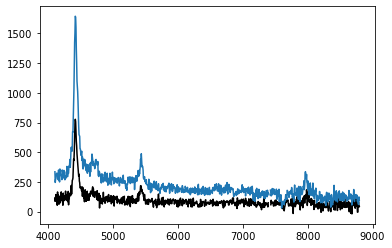

In [38]:
Spectra=DF.Spectra
z=DF.z
name=DF.Name

source=np.load(path+Spectra[i],allow_pickle=True)  
print(Spectra[i])
z=DF.z[i]
print(z)
wavelength=source[2]
flux=source[0]
bright_flux=flux1=flux[0]
faint_flux=flux2=flux[1]
x=wavelength
pos=np.where((x>4100) & (x<8800))
X=wavelength[pos]
plt.plot(X,bright_flux[pos],color='k')
plt.plot(X,faint_flux[pos])

In [ ]:
print(z)
x=wavelength[pos]/(z+1)
y1=bright_flux[pos]
y2=faint_flux[pos]
if ((z>1.42) and (z<2.178)):
    p0=[med,0,10,1549,1,10,1908,1,10,2800,1]
    popt1,pcov1= curve_fit(gauss3,x,y1,p0=p0)
        
        
    FWHM_CIV=round(2*np.sqrt(2*np.log(2))*popt1[4])
    FWHM_CIII=round(2*np.sqrt(2*np.log(2))*popt1[7])
    FWHM_MgII=round(2*np.sqrt(2*np.log(2))*popt1[10])



    CIV_low=(popt1[0]+popt1[1]*popt1[3])
    CIV_high=(gauss3(popt1[3],*popt1))    
    CIV_dif=CIV_high-CIV_low
    
    CIII_low=(popt1[0]+popt1[1]*popt1[6])
    CIII_high=(gauss3(popt1[6],*popt1))    
    CIII_dif=CIII_high-CIII_low
    
    MgII_low=(popt1[0]+popt1[1]*popt1[9])
    MgII_high=(gauss3(popt1[9],*popt1))    
    MgII_dif=MgII_high-MgII_low
               
    print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII')
    value=[name[0],0,CIV_dif,CIII_dif,MGII_dif,0,FWHM_CIV,FWHM_CIII,FWHM_MGII]
    print(value)
 #   print(CIV_dif,CIII_dif,MgII_dif,'0')
    plt.plot(x,y1,label='redshifted data')
    plt.plot(x, gauss3(x, *popt1),'r', label='guassianfit')
    plt.xlabel('Wavelength')
    plt.ylabel('Flux')       
    plt.legend()
# elif ((z>1.42) and (z<3.6)):
#     p0=[med,0,10,1549,1,10,1908,1]
#     popt1,pcov1= curve_fit(gauss2,x,y1,p0=p0)
        
#     FWHM_CIV=round(2*np.sqrt(2*np.log(2))*popt1[4])
#     FWHM_CIII=round(2*np.sqrt(2*np.log(2))*popt1[7])


#     CIV_low=(popt1[0]+popt1[1]*popt1[3])
#     CIV_high=(gauss2(popt1[3],*popt1))    
#     CIV_dif=CIV_high-CIV_low

#     CIII_low=(popt1[0]+popt1[1]*popt1[6])
#     CIII_high=(gauss2(popt1[6],*popt1))    
#     CIII_dif=CIII_high-CIII_low
    
        
    
#     print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII')
#     value=[name[i],'0',CIV_dif,CIII_dif,'0','0',FWHM_CIV,FWHM_CIII,'0']
#     print(value)
#     ax[1].plot(x,y1,label='redshifted data')
#     ax[1].plot(x, gauss2(x, *popt1),'r', label='guassianfit')
#     ax[1].set_xlabel('Wavelength')
#     ax[1].set_ylabel('Flux')       
#     ax[1].legend()
elif ((z>=1.2) and (z<=2.178)):
    p0=[med,0,10,1908,1,10,2800,1]
    popt1,pcov1= curve_fit(gauss2,x,y1,p0=p0)
        
        
    FWHM_CIII=round(2*np.sqrt(2*np.log(2))*popt1[4])
    FWHM_MgII=round(2*np.sqrt(2*np.log(2))*popt1[7])


    CIII_low=(popt1[0]+popt1[1]*popt1[3])
    CIII_high=(gauss2(popt1[3],*popt1))    
    CIII_dif=CIII_high-CIII_low

    MgII_low=(popt1[0]+popt1[1]*popt1[6])
    MgII_high=(gauss2(popt1[6],*popt1))    
    MgII_dif=MgII_high-MgII_low
    
        
    
    print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII')
    value1=[name[i],0,0,CIII_dif,MgII_dif,0,0,FWHM_CIII,FWHM_MgII]
   # print(value1)
    plt.plot(x,y1,label='redshifted data')
    plt.plot(x, gauss2(x, *popt1),'r', label='guassianfit')
    plt.xlabel('Wavelength')
    plt.ylabel('Flux')       
    plt.legend()
elif ((z>=0.7) and (z<=1.857)):
    p0=[med,0,10,2800,1]
    popt1,pcov1= curve_fit(gauss1,x,y2,p0=p0)
        
          
    FWHM_MgII=round(2*np.sqrt(2*np.log(2))*popt1[4])


    MgII_low=(popt1[0]+popt1[1]*popt1[3])
    MgII_high=(gauss1(popt1[3],*popt1))    
    MgII_dif=MgII_high-MgII_low
    
    
    print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII')
    value1=[name[i],0,0,0,MgII_dif,0,0,0,FWHM_MgII]
    #print(value1)
    plt.plot(x,y2,label='redshifted data')
    plt.plot(x, gauss1(x, *popt1),'r', label='guassianfit')
    plt.xlabel('Wavelength')
    plt.ylabel('Flux')       
    plt.legend()
plt.ylim(-2000,2000)
plt.show()

In [ ]:
DF=pd.read_csv('NTT.csv',header=0)
Spectra=DF.Spectra
z=DF.z
name=DF.Name
for i in range(0,len(DF)): 
    source=np.load(path+Spectra[i],allow_pickle=True)  
    print(Spectra[i])
    z=DF.z[i]
    print(z)
    wavelength=source[2]
    flux=source[0]
    bright_flux=flux1=flux[0]
    faint_flux=flux2=flux[1]
    fig, ax=plt.subplots(2,1,figsize=(10,10))
###BRIGHT SPECTRUM---------------------------------------------------------------------------------------
    x=wavelength
    pos=np.where((x >3760) & (x <8900)) 
    X=wavelength[pos]
    
    x=X/(z+1)
    y1=flux1[pos]
    x= np.nan_to_num(x)
    y1= np.nan_to_num(y1)        
    med1=statistics.median(y1) 
    y2=flux2[pos]
    x= np.nan_to_num(x)
    y2= np.nan_to_num(y2)
    med2=statistics.median(y2)
    
    if ((z>=2) and (z<=2.178)):
    
        p01=[med1,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1] #change this when : Optimal parameters not found:
                                             #Number of calls to function has reached maxfev = 1800.
        popt1,pcov1= curve_fit(gauss4,x,y1,p0=p01,
            bounds=[[-np.inf,-np.inf,-np.inf,1200,-np.inf,-np.inf,1535,-np.inf,-np.inf,1895,-np.inf,-np.inf,2785,-np.inf]
            ,[np.inf,np.inf,np.inf,1230,np.inf,np.inf,1565,np.inf,np.inf,1915,np.inf,np.inf,2815,np.inf]])
        FWHM_LyA1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[10])
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[13])


        LyA_low1=(popt1[0]+popt1[1]*popt1[3])
        LyA_high1=(gauss4(popt1[3],*popt1))    
        LyA_dif1=LyA_high1-LyA_low1

        CIV_low1=(popt1[0]+popt1[1]*popt1[6])
        CIV_high1=(gauss4(popt1[6],*popt1))    
        CIV_dif1=CIV_high1-CIV_low1
        
        CIII_low1=(popt1[0]+popt1[1]*popt1[9])
        CIII_high1=(gauss4(popt1[9],*popt1))    
        CIII_dif1=CIII_high1-CIII_low1
    
        MgII_low1=(popt1[0]+popt1[1]*popt1[12])
        MgII_high1=(gauss4(popt1[12],*popt1))    
        MgII_dif1=MgII_high1-MgII_low1
                   
      #  print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
      #    'CIV_Conti','CIII_Conti','MgII_Conti')
        value1=[name[i],LyA_dif1,CIV_dif1,CIII_dif1,MgII_dif1,FWHM_LyA1,FWHM_CIV1,FWHM_CIII1,FWHM_MgII1,popt1[3],popt1[6],
          popt1[9],popt1[12]]
        print(value1)
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss4(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1] #change this when : Optimal parameters not found:
                                                 #Number of calls to function has reached maxfev = 1800.
        popt2,pcov2= curve_fit(gauss4,x,y2,p0=p02,
        bounds=[[-np.inf,-np.inf,-np.inf,1200,-np.inf,-np.inf,1535,-np.inf,-np.inf,1895,-np.inf,-np.inf,2785,
                 -np.inf]
                 ,[np.inf,np.inf,np.inf,1230,np.inf,np.inf,1565,np.inf,np.inf,1920,np.inf,np.inf,2815,np.inf]])

        FWHM_LyA2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[10])
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[13])


        LyA_low2=(popt2[0]+popt2[1]*popt2[3])
        LyA_high2=(gauss4(popt2[3],*popt2))    
        LyA_dif2=LyA_high2-LyA_low2

        CIV_low2=(popt2[0]+popt2[1]*popt2[6])
        CIV_high2=(gauss4(popt2[6],*popt2))    
        CIV_dif2=CIV_high2-CIV_low2
    
        CIII_low2=(popt2[0]+popt2[1]*popt2[9])
        CIII_high2=(gauss4(popt2[9],*popt2))    
        CIII_dif2=CIII_high2-CIII_low2
    
        MgII_low2=(popt2[0]+popt2[1]*popt2[12])
        MgII_high2=(gauss4(popt2[12],*popt2))    
        MgII_dif2=MgII_high2-MgII_low2
               
     #   print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
     #     'CIV_Conti','CIII_Conti','MgII_Conti')
        value2=[name[i],LyA_dif2,CIV_dif2,CIII_dif2,MgII_dif2,FWHM_LyA2,FWHM_CIV2,FWHM_CIII2,FWHM_MgII2,
               popt2[3],popt2[6],popt2[9],popt2[12]]
        print(value2)
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss4(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        
        
        
        
        
        
    elif ((z>=1.42) and (z<=2.178)):
        p01=[med1,1,10,1549,1,10,1908,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss3,x,y1,p0=p01,
            bounds=[[-np.inf,-np.inf,-np.inf,1535,-np.inf,-np.inf,1895,-np.inf,-np.inf,2785,-np.inf],
                    [np.inf,np.inf,np.inf,1565,np.inf,np.inf,1920,np.inf,np.inf,2815,np.inf]])
        
        
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[10])



        CIV_low1=(popt1[0]+popt1[1]*popt1[3])
        CIV_high1=(gauss3(popt1[3],*popt1))    
        CIV_dif1=CIV_high1-CIV_low1
    
        CIII_low1=(popt1[0]+popt1[1]*popt1[6])
        CIII_high1=(gauss3(popt1[6],*popt1))    
        CIII_dif1=CIII_high1-CIII_low1
    
        MgII_low1=(popt1[0]+popt1[1]*popt1[9])
        MgII_high1=(gauss3(popt1[9],*popt1))    
        MgII_dif1=MgII_high1-MgII_low1
               
      #  print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
      #    'CIV_Conti','CIII_Conti','MgII_Conti')
        value1=[name[i],0,CIV_dif1,CIII_dif1,MgII_dif1,0,FWHM_CIV1,FWHM_CIII1,FWHM_MgII1,0,
                popt1[3],popt1[6],popt1[9]]
        print(value1)
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss3(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1549,1,10,1908,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss3,x,y2,p0=p02,
                    bounds=[[-np.inf,-np.inf,-np.inf,1535,-np.inf,-np.inf,1895,-np.inf,-np.inf,2785,-np.inf],
                            [np.inf,np.inf,np.inf,1565,np.inf,np.inf,1920,np.inf,np.inf,2815,np.inf]])

        
        
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[10])



        CIV_low2=(popt2[0]+popt2[1]*popt2[3])
        CIV_high2=(gauss3(popt2[3],*popt2))    
        CIV_dif2=CIV_high2-CIV_low2
    
        CIII_low2=(popt2[0]+popt2[1]*popt2[6])
        CIII_high2=(gauss3(popt2[6],*popt2))    
        CIII_dif2=CIII_high2-CIII_low2
    
        MgII_low2=(popt2[0]+popt2[1]*popt2[9])
        MgII_high2=(gauss3(popt2[9],*popt2))    
        MgII_dif2=MgII_high2-MgII_low2
               
        #print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
        #  'CIV_Conti','CIII_Conti','MgII_Conti')
        value2=[name[i],0,CIV_dif2,CIII_dif2,MgII_dif2,0,FWHM_CIV2,FWHM_CIII2,FWHM_MgII2,0,popt2[3],popt2[6]
                ,popt2[9]]
        print(value2)
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss3(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        
        
        
    
    elif ((z>=2.092) and (z<=3.664)):
        p01=[med1,1,10,1215,1,10,1549,1,10,1908,1] 
        popt1,pcov1= curve_fit(gauss3,x,y1,p0=p01,
        bounds=[[-np.inf,-np.inf,-np.inf,1200,-np.inf,-np.inf,1535,-np.inf,-np.inf,1895,-np.inf],
                [np.inf,np.inf,np.inf,1230,np.inf,np.inf,1565,np.inf,np.inf,1925,np.inf]])
        
        FWHM_LyA1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[10])


        LyA_low1=(popt1[0]+popt1[1]*popt1[3])
        LyA_high1=(gauss3(popt1[3],*popt1))    
        LyA_dif1=LyA_high1-LyA_low1

        CIV_low1=(popt1[0]+popt1[1]*popt1[6])
        CIV_high1=(gauss3(popt1[6],*popt1))    
        CIV_dif1=CIV_high1-CIV_low1
    
        CIII_low1=(popt1[0]+popt1[1]*popt1[9])
        CIII_high1=(gauss3(popt1[9],*popt1))    
        CIII_dif1=CIII_high1-CIII_low1
    
     #   print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
     #     'CIV_Conti','CIII_Conti','MgII_Conti')
        value1=[name[i],LyA_dif1,CIV_dif1,CIII_dif1,0,FWHM_LyA1,FWHM_CIV1,FWHM_CIII1,0,popt1[3],popt1[6],
                popt1[9],0]
        print(value1)
   # print(value)
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss3(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1215,1,10,1549,1,10,1908,1]
        popt2,pcov2= curve_fit(gauss3,x,y2,p0=p02,
                    bounds=[[-np.inf,-np.inf,-np.inf,1200,-np.inf,-np.inf,1535,-np.inf,-np.inf,1895,-np.inf]
                                    ,[np.inf,np.inf,np.inf,1230,np.inf,np.inf,1565,np.inf,np.inf,1925,np.inf]])

        
        FWHM_LyA2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[10])


        LyA_low2=(popt2[0]+popt2[1]*popt2[3])
        LyA_high2=(gauss3(popt2[3],*popt2))    
        LyA_dif2=LyA_high2-LyA_low2

        CIV_low2=(popt2[0]+popt2[1]*popt2[6])
        CIV_high2=(gauss3(popt2[6],*popt2))    
        CIV_dif2=CIV_high2-CIV_low2
        
        CIII_low2=(popt2[0]+popt2[1]*popt2[9])
        CIII_high2=(gauss3(popt2[9],*popt2))    
        CIII_dif2=CIII_high2-CIII_low2
    
       # print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
       #   'CIV_Conti','CIII_Conti','MgII_Conti')
        value2=[name[i],LyA_dif2,CIV_dif2,CIII_dif2,0,FWHM_LyA2,FWHM_CIV2,FWHM_CIII2,0,popt2[3],popt2[6]
                ,popt2[9],0]
   
        print(value2)
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss3(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        
    elif ((z>=0.9) and (z<=2.178)):
        p01=[med1,1,10,1908,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss2,x,y1,p0=p01,bounds=[[-np.inf,-np.inf,-np.inf,1895,-np.inf,-np.inf,2785,-np.inf],
                        [np.inf,np.inf,np.inf,1920,np.inf,np.inf,2815,np.inf]])
        
        
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[7])


        CIII_low1=(popt1[0]+popt1[1]*popt1[3])
        CIII_high1=(gauss2(popt1[3],*popt1))    
        CIII_dif1=CIII_high1-CIII_low1

        MgII_low1=(popt1[0]+popt1[1]*popt1[6])
        MgII_high1=(gauss2(popt1[6],*popt1))    
        MgII_dif1=MgII_high1-MgII_low1
    
        
     #   print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
     #     'CIV_Conti','CIII_Conti','MgII_Conti')
        value1=[name[i],0,0,CIII_dif,MgII_dif,0,0,FWHM_CIII,FWHM_MgII,0,0,popt1[3],popt1[6]]
        print(value1)
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss2(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,0,10,1908,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss2,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,1895,-np.inf,-np.inf,2785,-np.inf]
                                                         ,[np.inf,np.inf,np.inf,1920,np.inf,np.inf,2815,np.inf]])
                
        
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[7])


        CIII_low2=(popt2[0]+popt2[1]*popt2[3])
        CIII_high2=(gauss2(popt2[3],*popt2))    
        CIII_dif2=CIII_high2-CIII_low2

        MgII_low2=(popt2[0]+popt2[1]*popt2[6])
        MgII_high2=(gauss2(popt2[6],*popt2))    
        MgII_dif2=MgII_high2-MgII_low2
    
        
    
       # print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
          #'CIV_Conti','CIII_Conti','MgII_Conti')
        value2=[name[i],0,0,CIII_dif2,MgII_dif2,0,0,FWHM_CIII2,FWHM_MgII2,0,0,popt2[3],popt2[6]]
        print(value2)
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss2(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        
        
        
        
    elif ((z>=1.42) and (z<=3.6)):
        p01=[med1,1,10,1549,1,10,1908,1]
        popt1,pcov1= curve_fit(gauss2,x,y1,p0=p01,bounds=[[-np.inf,np.inf,-np.inf,1535,np.inf,np.inf,1895,np.inf]
                        ,[np.inf,np.inf,np.inf,1565,np.inf,np.inf,np.inf,1925,np.inf]])
        
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[7])


        CIV_low1=(popt1[0]+popt1[1]*popt1[3])
        CIV_high1=(gauss2(popt1[3],*popt1))    
        CIV_dif1=CIV_high1-CIV_low1

        CIII_low1=(popt1[0]+popt1[1]*popt1[6])
        CIII_high1=(gauss2(popt1[6],*popt1))    
        CIII_dif1=CIII_high1-CIII_low1    
        
    
       # print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
       #   'CIV_Conti','CIII_Conti','MgII_Conti')
        value1=[name[i],0,CIV_dif1,CIII_dif1,0,0,FWHM_CIV1,FWHM_CIII1,0,0,popt1[3],popt1[6],0]
        print(value1)
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss2(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,0,10,1549,1,10,1908,1]
        popt2,pcov2= curve_fit(gauss2,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,1535,-np.inf,-np.inf,1895,-np.inf],
                                                         [np.inf,np.inf,np.inf,1565,np.inf,np.inf,np.inf,1925,np.inf]])
        
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[7])


        CIV_low2=(popt2[0]+popt2[1]*popt2[3])
        CIV_high2=(gauss2(popt2[3],*popt2))    
        CIV_dif2=CIV_high2-CIV_low2

        CIII_low2=(popt2[0]+popt2[1]*popt2[6])
        CIII_high2=(gauss2(popt2[6],*popt2))    
        CIII_dif2=CIII_high2-CIII_low2
    
        
    
     #   print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
      #    'CIV_Conti','CIII_Conti','MgII_Conti')
        value2=[name[i],0,CIV_dif2,CIII_dif2,0,0,FWHM_CIV2,FWHM_CIII2,0,0,popt2[3],popt2[6],0]
        print(value2)
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss2(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
    
    elif ((z>=0.34) and (z<=2.178)):
        p01=[med1,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss1,x,y1,p0=p01,bounds=[[-np.inf,-np.inf,-np.inf,2785,-np.inf],
                                                         [np.inf,np.inf,np.inf,2815,np.inf]])
        
          
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[4])


        MgII_low1=(popt1[0]+popt1[1]*popt1[3])
        MgII_high1=(gauss1(popt1[3],*popt1))    
        MgII_dif1=MgII_high1-MgII_low1
    
    
       # print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
       #   'CIV_Conti','CIII_Conti','MgII_Conti')
        value1=[name[i],0,0,0,MgII_dif1,0,0,0,FWHM_MgII1,0,0,0,popt1[3]]
        print(value1)
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss1(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()  
        p02=[med2,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss1,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,2785,-np.inf],
                                                         [np.inf,np.inf,np.inf,2815,np.inf]])
            
          
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt1[4])


        MgII_low2=(popt2[0]+popt2[1]*popt2[3])
        MgII_high2=(gauss1(popt2[3],*popt2))    
        MgII_dif2=MgII_high2-MgII_low2
    
    
     
     #   print('name[i],LyA_dif,CIV_dif,CIII_dif,MGII_dif,FWHM_LyA,FWHM_CIV,FWHM_CIII,FWHM_MGII','LyA_Conti',
          #'CIV_Conti','CIII_Conti','MgII_Conti')
        value2=[name[i],0,0,0,MgII_dif2,0,0,0,FWHM_MgII2,0,0,0,popt2[3]]
        print(value2)
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss1(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
    
    

    
    
        
    with open('CSVFILE_bright.csv', 'a', newline='',) as f_object:
        writer_object = csv.writer(f_object)
        writer_object.writerow(value)  
        f_object.close()
    with open('CSVFILE_faint.csv', 'a', newline='',) as f_object:
        writer_object = csv.writer(f_object)
        writer_object.writerow(value1)  
        f_object.close()
    

    plt.savefig(path+name[i]+'.png')
    #plt.show()
    plt.clf()

,Unnamed: 0,name,LyA_dif_B,CIV_dif_B,CIII_dif_B,MGII_dif_B,FWHM_LyA_B,FWHM_CIV_B,FWHM_CIII_B,FWHM_MGII_B,...,CIII_dif_F,MGII_dif_F,FWHM_LyA_F,FWHM_CIV_F,FWHM_CIII_F,FWHM_MGII_F,LyA_Conti_F,CIV_Conti_F,CIII_Conti_F,MgII_Conti_F
0,0,J0045-3937,0.000000,564.106939,101.878939,70.417558,0,36,-28,50,...,172.642689,126.477559,0,-39,31,77,0.000000,1551.722253,1905.696953,2801.188820
1,1,J0247-0800,748.853162,675.451090,290.874831,0.000000,1778,-151,26,0,...,108.273436,0.000000,66,1050,182,0,1229.183258,1535.000000,1925.000000,0.000000
2,2,J0405-3730,202.428354,-56.980939,-331.137867,0.000000,-57,49,1131,0,...,3.439267,0.000000,63,58,0,0,1230.000000,1546.223939,1899.837783,0.000000
3,3,J0628-7448,2353.749169,796.742405,731.156104,0.000000,45,605,-53,0,...,46.091711,0.000000,38,73,62,0,1220.452971,1549.470307,1902.995087,0.000000
4,4,J0936-1211,-73.275332,-31.767014,1.431958,1234.212184,-1636,-47,143,-1,...,267.116267,526.007260,424,-85,-113,686,1230.000000,1537.784312,1895.000000,2815.000000
5,5,J1247-3253,0.000000,885.163176,309.558452,312.847242,0,33,36,-48,...,-3245.919142,-2582.186621,0,28,11555,54,0.000000,1549.728623,1919.999784,2798.114622
6,6,J0125-1012,0.000000,0.000000,131.651144,77.161195,0,0,498,-47,...,292.245979,195.144117,0,0,453,72,0.000000,0.000000,1895.000000,2797.500663
7,7,J0332-6608,0.000000,763.012331,316.379783,245.261241,0,50,62,93,...,110.038705,94.640326,0,59,60,88,0.000000,1551.227501,1904.328753,2809.508091
8,8,J0527-2431,0.000000,46.041267,37.464229,45.696472,0,16,113,-160,...,209.936957,209.257380,0,26,55,37,0.000000,1547.531883,1907.107049,2797.988411
9,9,J0833-0721,0.000000,0.000000,0.000000,294.495995,0,0,0,53,...,0.000000,276.737352,0,0,0,53,0.000000,0.000000,0.000000,2785.000000
